<a href="https://colab.research.google.com/github/zhengwen0425/Advanced-Data-Analysis-of-Employee-Mental-Health-in-the-Tech-Industry/blob/main/Mental_Health_in_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
url_2016 = "https://raw.githubusercontent.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python/main/Chapter15/2016.csv"
url_2017 = "https://raw.githubusercontent.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python/main/Chapter15/2017.csv"
url_2018 = "https://raw.githubusercontent.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python/main/Chapter15/2018.csv"
url_2019 = "https://raw.githubusercontent.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python/main/Chapter15/2019.csv"
url_2020 = "https://raw.githubusercontent.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python/main/Chapter15/2020.csv"
df_2016 = pd.read_csv(url_2016)
df_2017 = pd.read_csv(url_2017)
df_2018 = pd.read_csv(url_2018)
df_2019 = pd.read_csv(url_2019)
df_2020 = pd.read_csv(url_2020)

# Data Integration

In [3]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
# testing the funciton
similar("Apple","Appel")

0.8

In [4]:
# This chunk of code finds the common quesitons in the 4 data sources
Columns = pd.DataFrame(False, index = df_2017.columns, columns =['y2016','y2017','y2018','y2019','y2020'])
Columns.y2017 = True

for col in df_2016.columns:
    for incol in Columns.index:
        if(similar(col,incol)>0.7):
            Columns.at[incol,'y2016'] = True

for col in df_2018.columns:
    for incol in Columns.index:
        if(similar(col,incol)>0.7):
            Columns.at[incol,'y2018'] = True

for col in df_2019.columns:
    for incol in Columns.index:
        if(similar(col,incol)>0.7):
            Columns.at[incol,'y2019'] = True

for col in df_2020.columns:
    for incol in Columns.index:
        if(similar(col,incol)>0.7):
            Columns.at[incol,'y2020'] = True

Columns[Columns.y2016 & Columns.y2017 & Columns.y2018 & Columns.y2019&Columns.y2020]

,y2016,y2017,y2018,y2019,y2020
How many employees does your company or organization have?,True,True,True,True,True
Is your employer primarily a tech company/organization?,True,True,True,True,True
Is your primary role within your company related to tech/IT?,True,True,True,True,True
Does your employer provide mental health benefits as part of healthcare coverage?,True,True,True,True,True
Do you know the options for mental health care available under your employer-provided health coverage?,True,True,True,True,True
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",True,True,True,True,True
Does your employer offer resources to learn more about mental health disorders and options for seeking help?,True,True,True,True,True
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,True,True,True,True,True
"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",True,True,True,True,True
Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,True,True,True,True,True


In [5]:
Selected_columns = ['Does your employer provide mental health benefits as part of healthcare coverage?',
                    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
                    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
                    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
                    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
                    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
                    'Would you feel comfortable discussing a mental health issue with your coworkers?',
                    'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
                    'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
                    'How willing would you be to share with friends and family that you have a mental illness?',
                    'What is your age?',
                    'What is your gender?',
                    'What country do you <strong>live</strong> in?',
                    'What country do you <strong>work</strong> in?',
                    'Have you ever been diagnosed with a mental health disorder?',
                    'Have you ever sought treatment for a mental health disorder from a mental health professional?']

In [6]:
# if a column of 2016 data source is not one of the selected ones, this code drops it.
droping_cols = []
for col in df_2016.columns:
    maxScore = 0
    for sel_col in Selected_columns:
        if(similar(col,sel_col)>maxScore):
            maxScore = similar(col,sel_col)
    if (maxScore <0.7):
        droping_cols.append(col)
    else:
        if('previous' in col):
            droping_cols.append(col)


df_2016.drop(columns = droping_cols, inplace=True)
df_2016.head(1)

,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,"If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,How willing would you be to share with friends and family that you have a mental illness?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,What is your gender?,What country do you live in?,What country do you work in?
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,0,39,Male,United Kingdom,United Kingdom


In [7]:
# if a column of 2017 data source is not one of the selected ones, this code drops it.
droping_cols = []
for col in df_2017.columns:
    maxScore = 0
    for sel_col in Selected_columns:
        if(similar(col,sel_col)>maxScore):
            maxScore = similar(col,sel_col)
    if (maxScore <0.7):
        droping_cols.append(col)
    else:
        if('previous' in col):
            droping_cols.append(col)

df_2017.drop(columns = droping_cols, inplace=True)
df_2017.head(1)

,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,"If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",...,Have you ever been diagnosed with a mental health disorder?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How willing would you be to share with friends and family that you have a mental illness?,What is your age?,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?
0,No,No,I don't know,I don't know,I don't know,Yes,Yes,1.0,NaN,NaN,...,NaN,1,5,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN


In [8]:
# if a column of 2018 data source is not one of the selected ones, this code drops it.
droping_cols = []
for col in df_2018.columns:
    maxScore = 0
    for sel_col in Selected_columns:
        if(similar(col,sel_col)>maxScore):
            maxScore = similar(col,sel_col)
    if (maxScore <0.7):
        droping_cols.append(col)
    else:
        if('previous' in col):
            droping_cols.append(col)

df_2018.drop(columns = droping_cols, inplace=True)
df_2018.head(1)

,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,"If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",...,Have you ever been diagnosed with a mental health disorder?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How willing would you be to share with friends and family that you have a mental illness?,What is your age?,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?
0,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,1.0,NaN,NaN,...,NaN,1,3,57,Female,Canada,NaN,NaN,Canada,NaN


In [9]:
# if a column of 2019 data source is not one of the selected ones, this code drops it.
droping_cols = []
for col in df_2019.columns:
    maxScore = 0
    for sel_col in Selected_columns:
        if(similar(col,sel_col)>maxScore):
            maxScore = similar(col,sel_col)
    if (maxScore <0.7):
        droping_cols.append(col)
    else:
        if('previous' in col):
            droping_cols.append(col)

df_2019.drop(columns = droping_cols, inplace=True)
df_2019.head(1)

,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,"If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Would you have been willing to discuss your mental health with your direct supervisor(s)?,Have you ever been *diagnosed* with a mental health disorder?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How willing would you be to share with friends and family that you have a mental illness?,What is your age?,What is your gender?,What country do you *live* in?,What is your race?,What country do you *work* in?
0,I don't know,Yes,Yes,I don't know,Very easy,Yes,Yes,True,NaN,NaN,Some of my previous supervisors,NaN,False,8,25,Male,United States of America,White,United States of America


In [10]:
# if a column of 2020 data source is not one of the selected ones, this code drops it.
droping_cols = []
for col in df_2020.columns:
    maxScore = 0
    for sel_col in Selected_columns:
        if(similar(col,sel_col)>maxScore):
            maxScore = similar(col,sel_col)
    if (maxScore <0.7):
        droping_cols.append(col)
    else:
        if('previous' in col):
            droping_cols.append(col)

df_2020.drop(columns = droping_cols, inplace=True)
df_2020.head(1)

,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,"If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Would you have been willing to discuss your mental health with your direct supervisor(s)?,Have you ever been *diagnosed* with a mental health disorder?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How willing would you be to share with friends and family that you have a mental illness?,What is your age?,What is your gender?,What country do you *live* in?,What is your race?,What country do you *work* in?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm not sure,"No, none of my previous supervisors",NaN,0,5,45,Male,United States of America,White,United States of America


In [11]:
Column_dict = {'SupportQ1': 'Does your employer provide mental health benefits as part of healthcare coverage?',
               'SupportQ2': 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
               'SupportQ3': 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
               'SupportQ4': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
               'SupportQ5': 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
               'AttitudeQ1': 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
               'AttitudeQ2': 'Would you feel comfortable discussing a mental health issue with your coworkers?',
               'AttitudeQ3': 'How willing would you be to share with friends and family that you have a mental illness?',
               'SupportEx1': 'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
               'SupportEx2': 'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
               'Age': 'What is your age?',
               'Gender': 'What is your gender?',
               'ResidingCountry': 'What country do you <strong>live</strong> in?',
               'WorkingCountry': 'What country do you <strong>work</strong> in?',
               'MentalIlness': 'Have you ever been diagnosed with a mental health disorder?',
               'Treatment' : 'Have you ever sought treatment for a mental health disorder from a mental health professional?'}
Column_dict

{'SupportQ1': 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'SupportQ2': 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'SupportQ3': 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'SupportQ4': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'SupportQ5': 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'AttitudeQ1': 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
 'AttitudeQ2': 'Would you feel comfortable discussing a mental health issue with your coworkers?',
 'AttitudeQ3': 'How willing would you be to share with friends and family that you have a mental illness

In [12]:
# Rename the columns - make the shorter
for col in df_2016.columns:
    for key in Column_dict:
        if(similar(col,Column_dict[key])>0.9):
            df_2016.rename({col:key}, axis='columns', inplace=True)
df_2016.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",AttitudeQ2,AttitudeQ1,"If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,AttitudeQ3,Have you been diagnosed with a mental health condition by a medical professional?,Treatment,Age,Gender,What country do you live in?,What country do you work in?
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,0,39,Male,United Kingdom,United Kingdom


In [13]:
Others = {'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:':'SupportQ5',
         'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?':'SupportEx1',
          'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?':'SupportEx2',
         'Have you been diagnosed with a mental health condition by a medical professional?':'MentalIlness',
         'What country do you live in?':'ResidingCountry',
         'What country do you work in?':'WorkingCountry'}
df_2016.rename(Others, axis='columns', inplace=True)
df_2016.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ2,AttitudeQ1,SupportEx1,SupportEx2,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,AttitudeQ3,MentalIlness,Treatment,Age,Gender,ResidingCountry,WorkingCountry
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,0,39,Male,United Kingdom,United Kingdom


In [14]:
df_2016 = df_2016[list(Column_dict.keys())]
df_2016.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Yes,Maybe,Somewhat open,NaN,NaN,39,Male,United Kingdom,United Kingdom,Yes,0
1,No,Yes,Yes,Yes,Somewhat easy,Yes,Maybe,Somewhat open,NaN,NaN,29,male,United States of America,United States of America,Yes,1
2,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Somewhat open,NaN,NaN,38,Male,United Kingdom,United Kingdom,No,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,I'm not sure,I'm not sure,43,male,United Kingdom,United Kingdom,Yes,1
4,Yes,No,No,No,Neither easy nor difficult,No,Maybe,Somewhat open,NaN,NaN,43,Female,United States of America,United States of America,Yes,1


In [15]:
# Rename the columns - make the shorter
for col in df_2017.columns:
    for key in Column_dict:
        if(similar(col,Column_dict[key])>0.95):
            df_2017.rename({col:key}, axis='columns', inplace=True)
df_2017.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,Have you ever discussed your mental health with coworkers?,SupportEx1,SupportEx2,...,MentalIlness,Treatment,AttitudeQ3,Age,Gender,ResidingCountry,What US state or territory do you <strong>live</strong> in?,What is your race?,WorkingCountry,What US state or territory do you <strong>work</strong> in?
0,No,No,I don't know,I don't know,I don't know,Yes,Yes,1.0,NaN,NaN,...,NaN,1,5,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN


In [16]:
df_2017 = df_2017[list(Column_dict.keys())]
df_2017.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,No,No,I don't know,I don't know,I don't know,Yes,Yes,5,NaN,NaN,27.0,Female,United Kingdom,United Kingdom,NaN,1
1,Yes,No,No,I don't know,I don't know,Maybe,Yes,4,NaN,NaN,31.0,male,United Kingdom,United Kingdom,NaN,0
2,I don't know,I don't know,No,Yes,Difficult,Yes,Maybe,5,NaN,NaN,36.0,male,United States of America,United States of America,Yes,1
3,Yes,I don't know,I don't know,Yes,Difficult,Yes,Yes,10,NaN,NaN,22.0,Male,United States of America,United States of America,Yes,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,No change,No change,52.0,female,United States of America,United States of America,NaN,1


In [17]:
# Rename the columns - make the shorter
for col in df_2018.columns:
    for key in Column_dict:
        if(similar(col,Column_dict[key])>0.95):
            df_2018.rename({col:key}, axis='columns', inplace=True)
df_2018.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,Have you ever discussed your mental health with coworkers?,SupportEx1,SupportEx2,...,MentalIlness,Treatment,AttitudeQ3,Age,Gender,ResidingCountry,What US state or territory do you <strong>live</strong> in?,What is your race?,WorkingCountry,What US state or territory do you <strong>work</strong> in?
0,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,1.0,NaN,NaN,...,NaN,1,3,57,Female,Canada,NaN,NaN,Canada,NaN


In [18]:
df_2018 = df_2018[list(Column_dict.keys())]
df_2018.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,3,NaN,NaN,57,Female,Canada,Canada,NaN,1
1,Yes,No,I don't know,I don't know,Somewhat difficult,No,No,3,NaN,NaN,29,male,United States of America,United States of America,Yes,1
2,Yes,No,No,I don't know,Somewhat easy,No,No,2,NaN,NaN,46,Male,United States of America,United States of America,NaN,0
3,No,No,No,I don't know,Neither easy nor difficult,No,Maybe,9,NaN,NaN,34,male,Norway,Norway,NaN,0
4,Yes,Yes,Yes,Yes,Somewhat easy,Yes,Yes,7,NaN,NaN,29,Ostensibly Male,United States of America,United States of America,Yes,1


In [19]:
# Rename the columns - make the shorter
for col in df_2019.columns:
    for key in Column_dict:
        if(similar(col,Column_dict[key])>0.95):
            df_2019.rename({col:key}, axis='columns', inplace=True)
df_2019.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,Have you ever discussed your mental health with coworkers?,SupportEx1,SupportEx2,Would you have been willing to discuss your mental health with your direct supervisor(s)?,MentalIlness,Treatment,AttitudeQ3,Age,Gender,What country do you *live* in?,What is your race?,What country do you *work* in?
0,I don't know,Yes,Yes,I don't know,Very easy,Yes,Yes,True,NaN,NaN,Some of my previous supervisors,NaN,False,8,25,Male,United States of America,White,United States of America


In [20]:
Others = {'What country do you *live* in?':'ResidingCountry',
         'What country do you *work* in?':'WorkingCountry'}
df_2019.rename(Others, axis='columns', inplace=True)
df_2019.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,Have you ever discussed your mental health with coworkers?,SupportEx1,SupportEx2,Would you have been willing to discuss your mental health with your direct supervisor(s)?,MentalIlness,Treatment,AttitudeQ3,Age,Gender,ResidingCountry,What is your race?,WorkingCountry
0,I don't know,Yes,Yes,I don't know,Very easy,Yes,Yes,True,NaN,NaN,Some of my previous supervisors,NaN,False,8,25,Male,United States of America,White,United States of America


In [21]:
df_2019 = df_2019[list(Column_dict.keys())]
df_2019.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,I don't know,Yes,Yes,I don't know,Very easy,Yes,Yes,8,NaN,NaN,25,Male,United States of America,United States of America,NaN,False
1,Yes,No,Yes,Yes,I don't know,Maybe,Maybe,7,NaN,NaN,51,male,United States of America,United States of America,NaN,False
2,I don't know,No,I don't know,I don't know,Somewhat difficult,No,Maybe,4,NaN,NaN,27,Male,United States of America,United States of America,NaN,False
3,I don't know,Yes,Yes,Yes,Very easy,Yes,Maybe,3,NaN,NaN,37,male,United States of America,United States of America,NaN,False
4,I don't know,I don't know,I don't know,I don't know,I don't know,No,No,1,NaN,NaN,46,m,United States of America,United States of America,NaN,False


In [22]:
# Rename the columns - make the shorter
for col in df_2020.columns:
    for key in Column_dict:
        if(similar(col,Column_dict[key])>0.95):
            df_2020.rename({col:key}, axis='columns', inplace=True)
df_2020.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,Have you ever discussed your mental health with coworkers?,SupportEx1,SupportEx2,Would you have been willing to discuss your mental health with your direct supervisor(s)?,MentalIlness,Treatment,AttitudeQ3,Age,Gender,What country do you *live* in?,What is your race?,What country do you *work* in?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm not sure,"No, none of my previous supervisors",NaN,0,5,45,Male,United States of America,White,United States of America


In [23]:
Others = {'What country do you *live* in?':'ResidingCountry',
         'What country do you *work* in?':'WorkingCountry'}
df_2020.rename(Others, axis='columns', inplace=True)
df_2020.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,Have you ever discussed your mental health with coworkers?,SupportEx1,SupportEx2,Would you have been willing to discuss your mental health with your direct supervisor(s)?,MentalIlness,Treatment,AttitudeQ3,Age,Gender,ResidingCountry,What is your race?,WorkingCountry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm not sure,"No, none of my previous supervisors",NaN,0,5,45,Male,United States of America,White,United States of America


In [24]:
df_2020 = pd.DataFrame(df_2020[list(Column_dict.keys())])
df_2020.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,I'm not sure,45,Male,United States of America,United States of America,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,Positively,Positively,24,female,Russia,Russia,Yes,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Negatively,Negatively,46,Male,India,India,No,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Negatively,Negatively,25,Female,Canada,Canada,No,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Negatively,I'm not sure,25,F,Canada,Canada,NaN,0


In [25]:
# Add the column year to all datasource before combining them all
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020

Column_dict['Year'] = 'The year this data was collected.'

In [26]:
# Integrate all data
in_df = pd.concat([df_2016,df_2017,df_2018,df_2019,df_2020])
in_df.reset_index(inplace=True)
in_df.drop(columns=['index'],inplace=True)
in_df.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment,Year
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Yes,Maybe,Somewhat open,NaN,NaN,39.0,Male,United Kingdom,United Kingdom,Yes,0,2016


In [27]:
in_df

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment,Year
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Yes,Maybe,Somewhat open,NaN,NaN,39.0,Male,United Kingdom,United Kingdom,Yes,0,2016
1,No,Yes,Yes,Yes,Somewhat easy,Yes,Maybe,Somewhat open,NaN,NaN,29.0,male,United States of America,United States of America,Yes,1,2016
2,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Somewhat open,NaN,NaN,38.0,Male,United Kingdom,United Kingdom,No,1,2016
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,I'm not sure,I'm not sure,43.0,male,United Kingdom,United Kingdom,Yes,1,2016
4,Yes,No,No,No,Neither easy nor difficult,No,Maybe,Somewhat open,NaN,NaN,43.0,Female,United States of America,United States of America,Yes,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,No,No,No,No,Somewhat difficult,No,No,9,NaN,NaN,53.0,Male,United States of America,United States of America,NaN,0,2020
3134,Yes,Yes,Yes,I don't know,Very easy,Maybe,Maybe,4,NaN,NaN,23.0,F,Philippines,Philippines,NaN,0,2020
3135,I don't know,No,I don't know,I don't know,Somewhat easy,Maybe,Maybe,7,NaN,NaN,34.0,Male,United States of America,United States of America,Yes,1,2020
3136,Yes,Yes,Yes,Yes,Difficult,No,Maybe,5,NaN,NaN,43.0,Male,Canada,Canada,NaN,1,2020


# Data Cleaning Level Ⅰ

In [28]:
# checking the possible values of each columns to see if further clearning is needed.
for col in in_df.columns:
    print(col)
    print(in_df[col].unique())
    print('---------------------------------------')

SupportQ1
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']
---------------------------------------
SupportQ2
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ3
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ4
["I don't know" 'Yes' nan 'No']
---------------------------------------
SupportQ5
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']
---------------------------------------
AttitudeQ1
['Yes' 'Maybe' nan 'No']
---------------------------------------
AttitudeQ2
['Maybe' nan 'Yes' 'No']
---------------------------------------
AttitudeQ3
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open' 5 4 10 8 3 6 2 9 7 1 0]
---------------------------------------
SupportEx1
[nan "I'm not sure" 'Yes' 'No' 'No change' 'Negative

## Clean Gender

In [29]:
# strip the strings so the acidental spaces do not throw off our codes
in_df.Gender = in_df.Gender.str.strip()

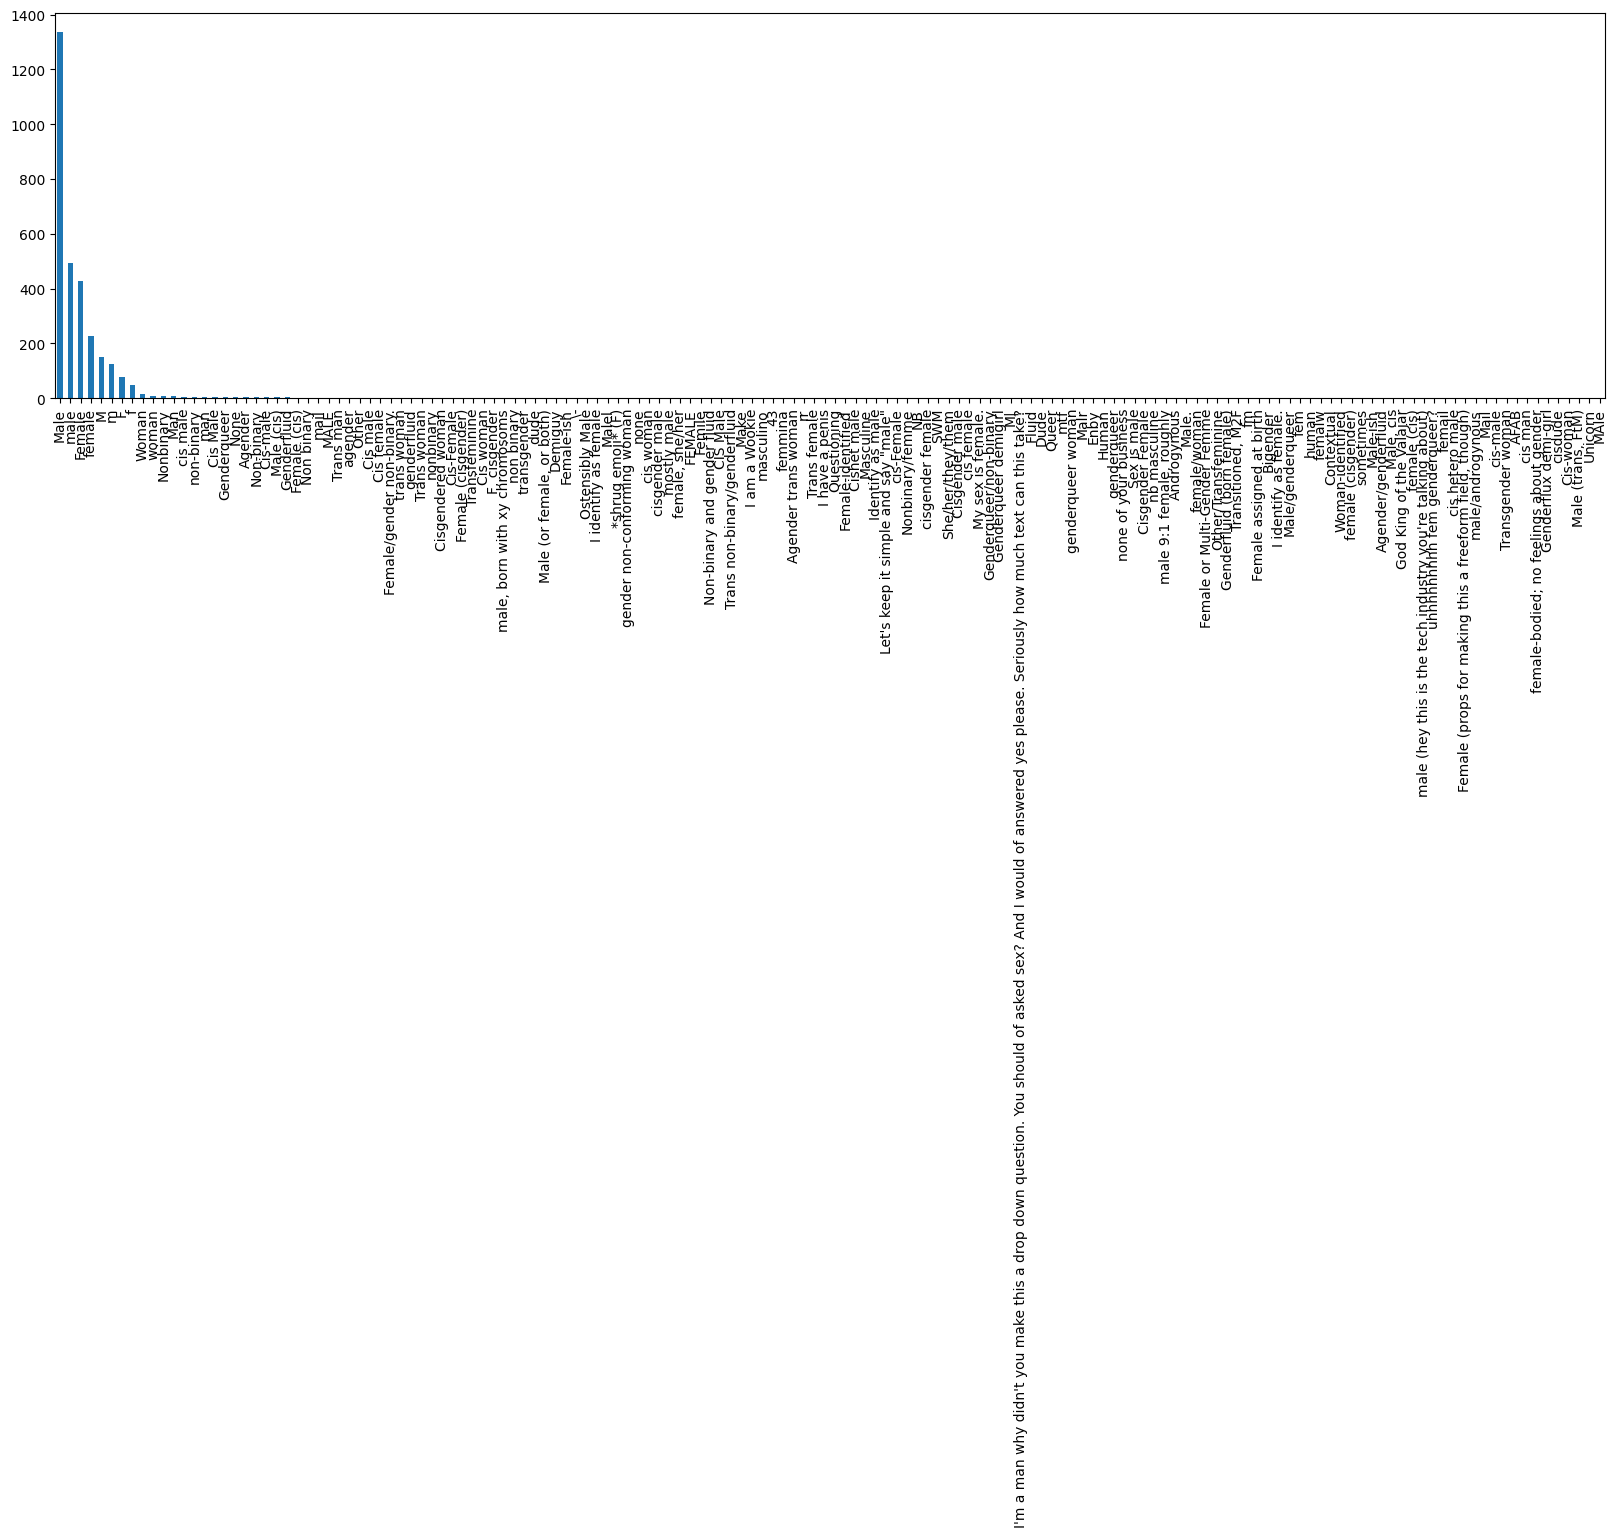

In [30]:
plt.figure(figsize=(20,5))
in_df.Gender.value_counts().plot(kind='bar', color = 'C0')
plt.savefig('Gender.png', dpi=1000,bbox_inches='tight')

In [31]:
in_df.Gender.value_counts()

Male                 1338
male                  495
Female                428
female                229
M                     150
                     ... 
cisdude                 1
Cis-woman               1
Male (trans, FtM)       1
Unicorn                 1
MAle                    1
Name: Gender, Length: 150, dtype: int64

In [32]:
rep_dic = {'male':'Male',
          'M':'Male',
          'm':'Male',
          'Man':'Male',
          'cis male':'Male',
          'Cis Male':'Male',
          'Cis-male':'Male',
          'CIS Male':'Male',
          'Male (cis)':'Male',
          'cis hetero male':'Male',
          'Mail':'Male',
          'mail':'Male',
          'Dude':'Male',
          'Male.':'Male',
          'Cis male':'Male',
          "Let's keep it simple and say 'male'":'Male',
          'cis-male':'Male',
          'dude':'Male',
          'cis man':'Male',
          'Make':'Male',
          'cisdude':'Male',
          'Cisgender male':'Male'}

in_df.Gender = in_df.Gender.replace(rep_dic)

In [33]:
in_df.Gender.value_counts()

Male                                                       2148
Female                                                      428
female                                                      229
F                                                            79
f                                                            49
                                                           ... 
Cis-woman                                                     1
Male (trans, FtM)                                             1
Unicorn                                                       1
Female (props for making this a freeform field, though)       1
MAle                                                          1
Name: Gender, Length: 129, dtype: int64

In [34]:
rep_dic = {'female':'Female',
          'f':'Female',
          'F':'Female',
          'Woman':'Female',
          'woman':'Female',
          'Female (cis)':'Female',
          'Cisgender Female':'Female',
          'female (cis)':'Female',
          'Cisgendered woman':'Female',
          'Cis-Female':'Female',
          'My sex is female.':'Female',
          'fm':'Female',
          'fem':'Female',
          'Female (cisgender)':'Female',
          'female (cisgender)':'Female',
          'Female (props for making this a freeform field, though)':'Female',
          'Cis woman':'Female',
          'female/woman':'Female',
          'F, cisgender':'Female',
          '*shrug emoji* (F)':'Female',
          'Cis-woman':'Female',
           'AFAB':'Female',
           'cis-Female':'Female',
           'cis female':'Female',
           'cisgender female':'Female',
           'cis woman':'Female'}

in_df.Gender = in_df.Gender.replace(rep_dic)

In [35]:
in_df.Gender.value_counts()

Male                    2148
Female                   832
Nonbinary                  8
man                        5
non-binary                 5
                        ... 
Genderflux demi-girl       1
Male (trans, FtM)          1
Unicorn                    1
human                      1
MAle                       1
Name: Gender, Length: 103, dtype: int64

In [36]:
def Replace_func(row):
    if(row.Gender != 'Male' and row.Gender != 'Female'):
        return 'Other'
    else:
        return row.Gender

In [37]:
in_df.Gender = in_df.apply(Replace_func,axis=1)

In [38]:
in_df.Gender.value_counts()

Male      2148
Female     832
Other      158
Name: Gender, dtype: int64

In [39]:
# Recheck to see what other columns need cleaning
for col in in_df.columns:
    print(col)
    print(in_df[col].unique())
    print('---------------------------------------')

SupportQ1
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']
---------------------------------------
SupportQ2
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ3
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ4
["I don't know" 'Yes' nan 'No']
---------------------------------------
SupportQ5
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']
---------------------------------------
AttitudeQ1
['Yes' 'Maybe' nan 'No']
---------------------------------------
AttitudeQ2
['Maybe' nan 'Yes' 'No']
---------------------------------------
AttitudeQ3
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open' 5 4 10 8 3 6 2 9 7 1 0]
---------------------------------------
SupportEx1
[nan "I'm not sure" 'Yes' 'No' 'No change' 'Negative

## Clean AttitudeQ3

In [40]:
print(Column_dict['AttitudeQ3'])
in_df.AttitudeQ3.value_counts()

How willing would you be to share with friends and family that you have a mental illness?


Somewhat open                                            640
10                                                       265
8                                                        264
7                                                        256
Very open                                                251
5                                                        219
Somewhat not open                                        214
6                                                        163
9                                                        162
Neutral                                                  141
Not applicable to me (I do not have a mental illness)    112
3                                                        108
4                                                         86
2                                                         79
Not open at all                                           75
0                                                         55
1                       

In [41]:
replace_dic = {10:'Very open',
              9:'Very open',
              8:'Somewhat open',
              7:'Somewhat open',
              6:'Somewhat open',
              5:'Neutral',
              4:'Somewhat not open',
              3:'Somewhat not open',
              2:'Somewhat not open',
              1:'Not open at all',
              0:'Not open at all'}

in_df.AttitudeQ3 = in_df.AttitudeQ3.replace(replace_dic)

In [42]:
print(Column_dict['AttitudeQ3'])
in_df.AttitudeQ3.value_counts()

How willing would you be to share with friends and family that you have a mental illness?


Somewhat open                                            1323
Very open                                                 678
Somewhat not open                                         487
Neutral                                                   360
Not open at all                                           178
Not applicable to me (I do not have a mental illness)     112
Name: AttitudeQ3, dtype: int64

<Axes: >

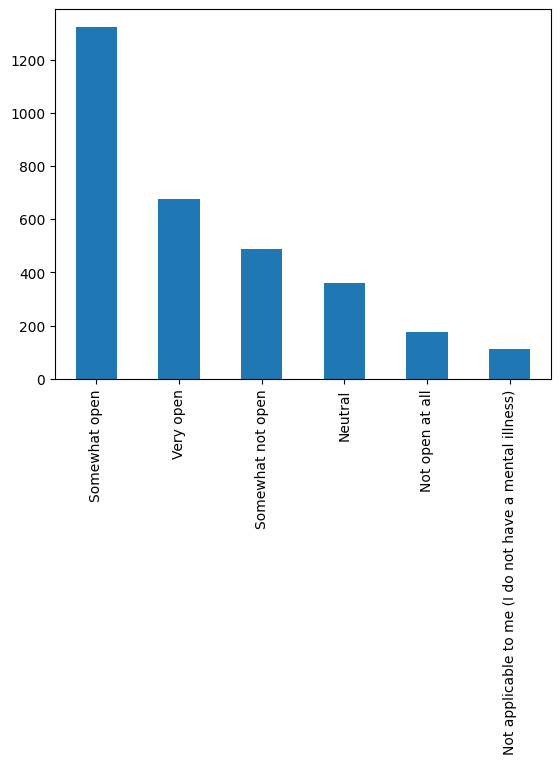

In [43]:
in_df.AttitudeQ3.value_counts().plot(kind='bar', color = 'C0')

In [44]:
# Recheck to see what other columns need cleaning
for col in in_df.columns:
    print(col)
    print(in_df[col].unique())
    print('---------------------------------------')

SupportQ1
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']
---------------------------------------
SupportQ2
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ3
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ4
["I don't know" 'Yes' nan 'No']
---------------------------------------
SupportQ5
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']
---------------------------------------
AttitudeQ1
['Yes' 'Maybe' nan 'No']
---------------------------------------
AttitudeQ2
['Maybe' nan 'Yes' 'No']
---------------------------------------
AttitudeQ3
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open']
---------------------------------------
SupportEx1
[nan "I'm not sure" 'Yes' 'No' 'No change' 'Negatively' 'Positively']
-----

## Clean SupportQ1

In [45]:
replace_dic = {'Not eligible for coverage / N/A':'Not eligible',
              'Not eligible for coverage / NA':'Not eligible'}

in_df.SupportQ1 = in_df.SupportQ1.replace(replace_dic)

In [46]:
print(Column_dict['SupportQ1'])
in_df.SupportQ1.value_counts()

Does your employer provide mental health benefits as part of healthcare coverage?


Yes             1331
I don't know     708
No               416
Not eligible     154
Name: SupportQ1, dtype: int64

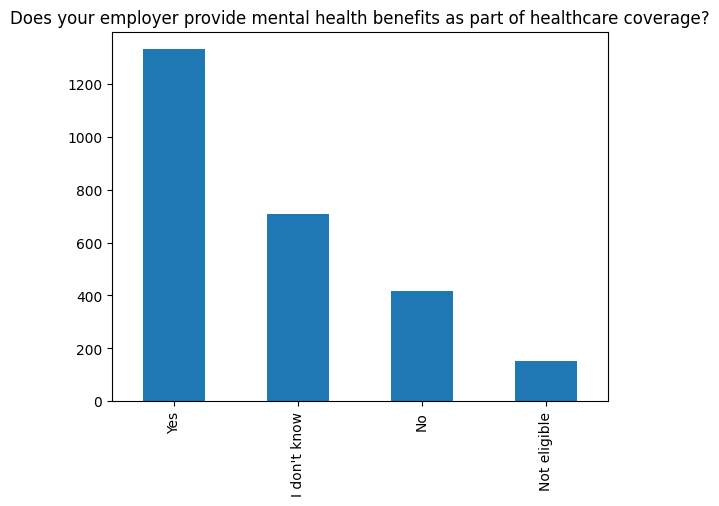

In [47]:
in_df['SupportQ1'].value_counts().plot(kind='bar', color = 'C0')
plt.title(Column_dict['SupportQ1'])
plt.show()

# **Clean SupportEx1 and SupportEx2**

In [48]:
replace_dic = {'Yes':'Negatively',
              'No':"I'm not sure"}

in_df.SupportEx1 = in_df.SupportEx1.replace(replace_dic)

In [49]:
replace_dic = {'Yes':'Negatively',
              'No':"I'm not sure"}

in_df.SupportEx2 = in_df.SupportEx2.replace(replace_dic)

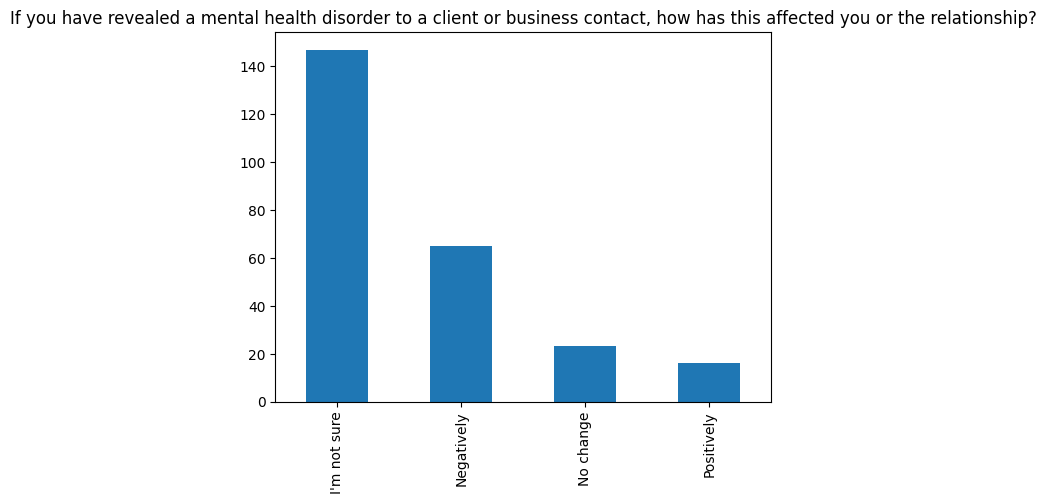

In [50]:
in_df.SupportEx1.value_counts().plot(kind='bar', color = 'C0')
plt.title(Column_dict['SupportEx1'])

plt.show()

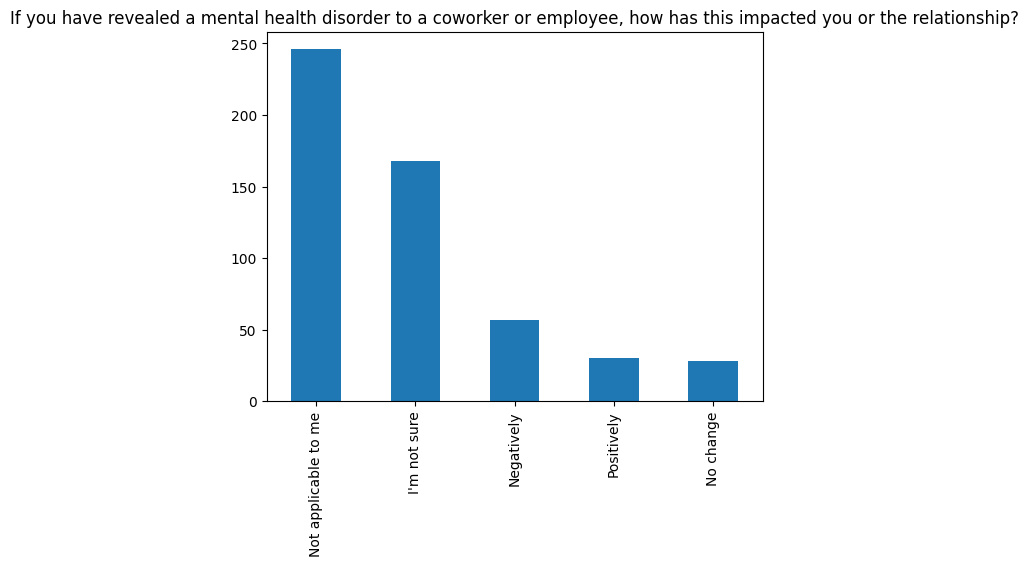

In [51]:
in_df.SupportEx2.value_counts().plot(kind='bar', color = 'C0')
plt.title(Column_dict['SupportEx2'])
plt.show()

# **Clean Treatment**

In [52]:
replace_dic = {0:'No',
              1:'Yes'}

in_df.Treatment = in_df.Treatment.replace(replace_dic)

In [53]:
in_df.Treatment.unique()

array(['No', 'Yes'], dtype=object)

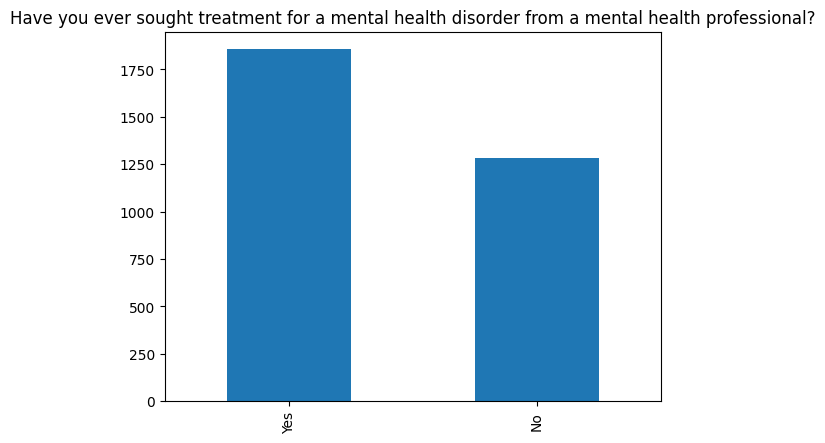

In [54]:
in_df.Treatment.value_counts().plot(kind='bar', color = 'C0')
plt.title(Column_dict['Treatment'])
plt.show()

In [55]:
# reset the index due to removal of some of the rows
in_df.reset_index(inplace=True)
in_df.drop(columns =['index'], inplace=True )

# **Detecting and dealing with outliers and errors**

In [56]:
for col in in_df.columns:
    print(col)
    print(in_df[col].value_counts())
    print('---------------------------------------')

SupportQ1
Yes             1331
I don't know     708
No               416
Not eligible     154
Name: SupportQ1, dtype: int64
---------------------------------------
SupportQ2
No              1702
Yes              665
I don't know     242
Name: SupportQ2, dtype: int64
---------------------------------------
SupportQ3
No              1153
Yes              757
I don't know     699
Name: SupportQ3, dtype: int64
---------------------------------------
SupportQ4
I don't know    1633
Yes              813
No               163
Name: SupportQ4, dtype: int64
---------------------------------------
SupportQ5
Somewhat easy                 681
Very easy                     536
I don't know                  399
Somewhat difficult            378
Neither easy nor difficult    362
Difficult                     135
Very difficult                118
Name: SupportQ5, dtype: int64
---------------------------------------
AttitudeQ1
Yes      973
Maybe    865
No       771
Name: AttitudeQ1, dtype: int64
--------

In [57]:
cat_attribues = ['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5',
       'AttitudeQ1', 'AttitudeQ2', 'AttitudeQ3', 'SupportEx1', 'SupportEx2', 'Gender',
       'MentalIlness', 'Treatment', 'Year','ResidingCountry', 'WorkingCountry']
num_attribues = ['Age']

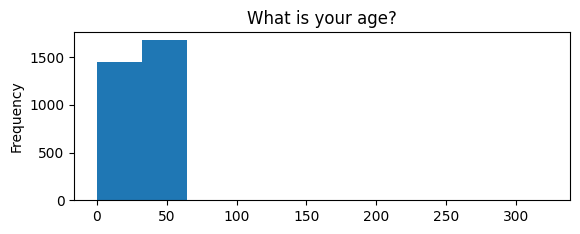

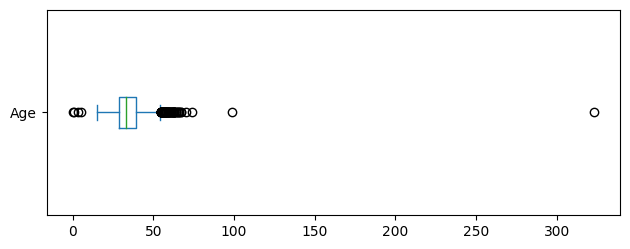

In [58]:
# First Numerical Attributes
plt.subplot(2,1,1)
in_df.Age.plot(kind='hist')
plt.title(Column_dict['Age'])
plt.show()
plt.subplot(2,1,2)
in_df.Age.plot.box(vert=False)
plt.tight_layout()
plt.show()

There seem to exist two unreasonably high and one unreasonably low values for age. These are probably mistaken inputs. Therefore, we switch these values to NaN.

In [59]:
BM = (in_df.Age > 95) | (in_df.Age<18)
ageMistake_indices = in_df[BM].index
ageMistake_indices

for idx in ageMistake_indices:
    in_df.at[idx,'Age'] = np.nan

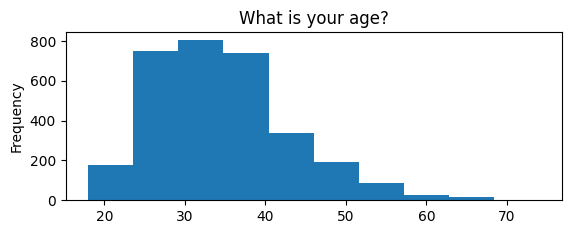

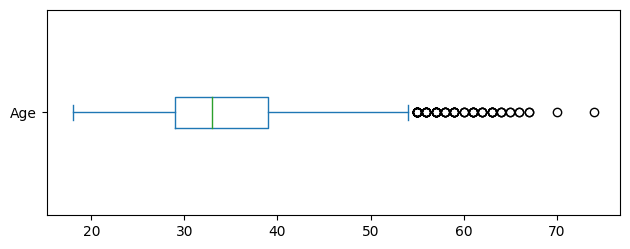

In [60]:
# First Numerical Attributes
plt.subplot(2,1,1)
in_df.Age.plot(kind='hist')
plt.title(Column_dict['Age'])
plt.show()
plt.subplot(2,1,2)
in_df.Age.plot.box(vert=False)
plt.tight_layout()
plt.show()

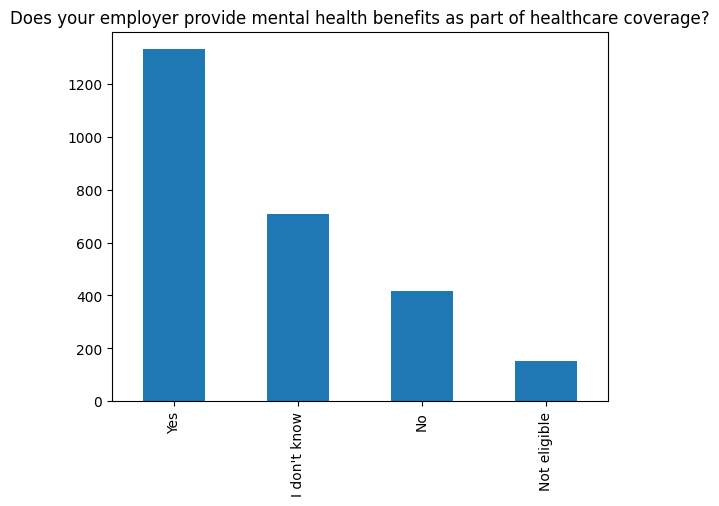

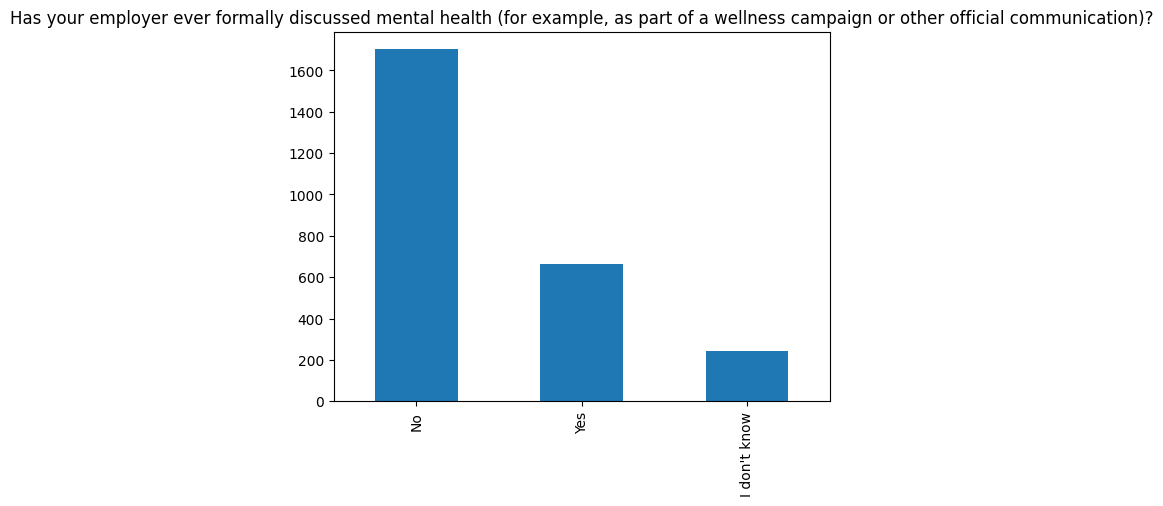

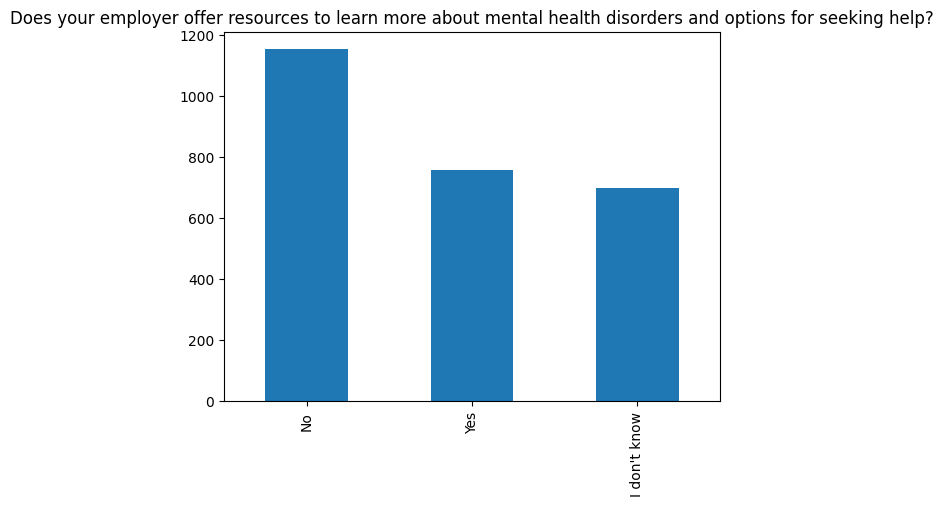

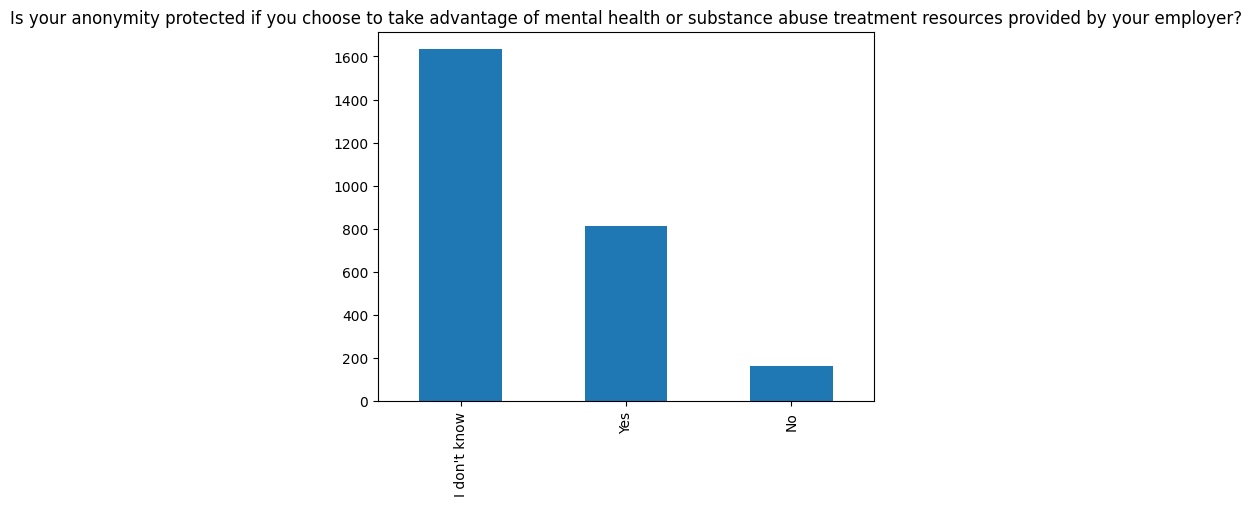

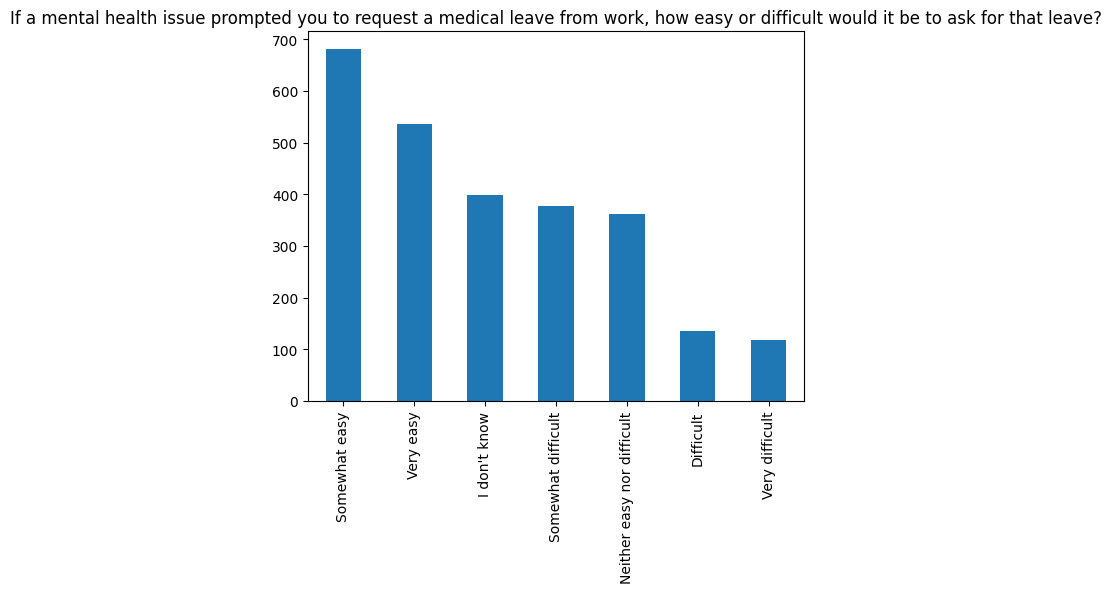

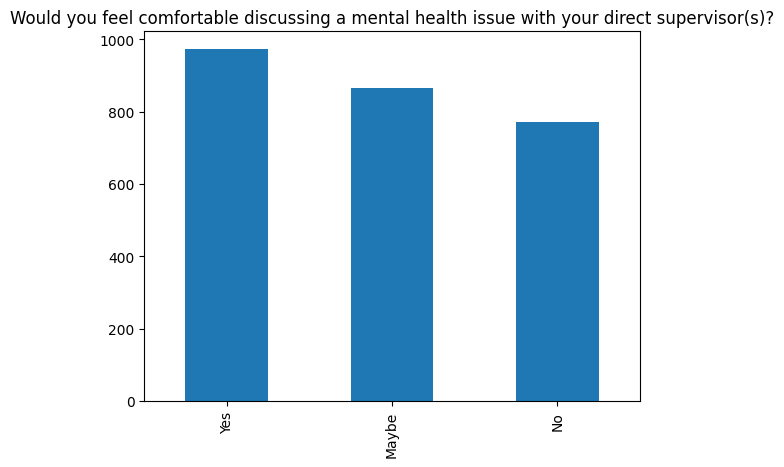

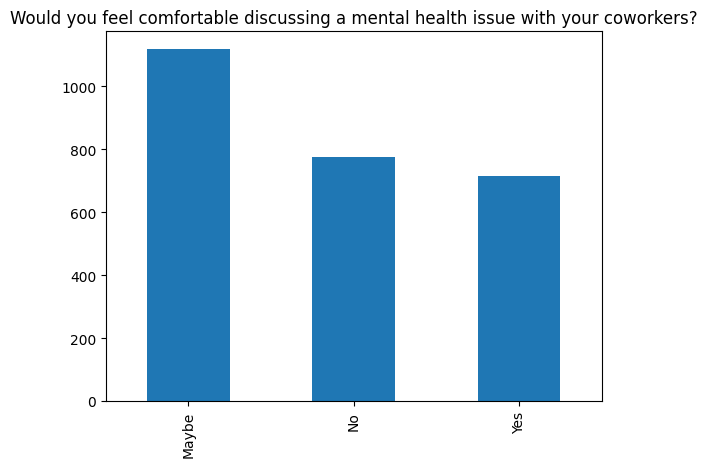

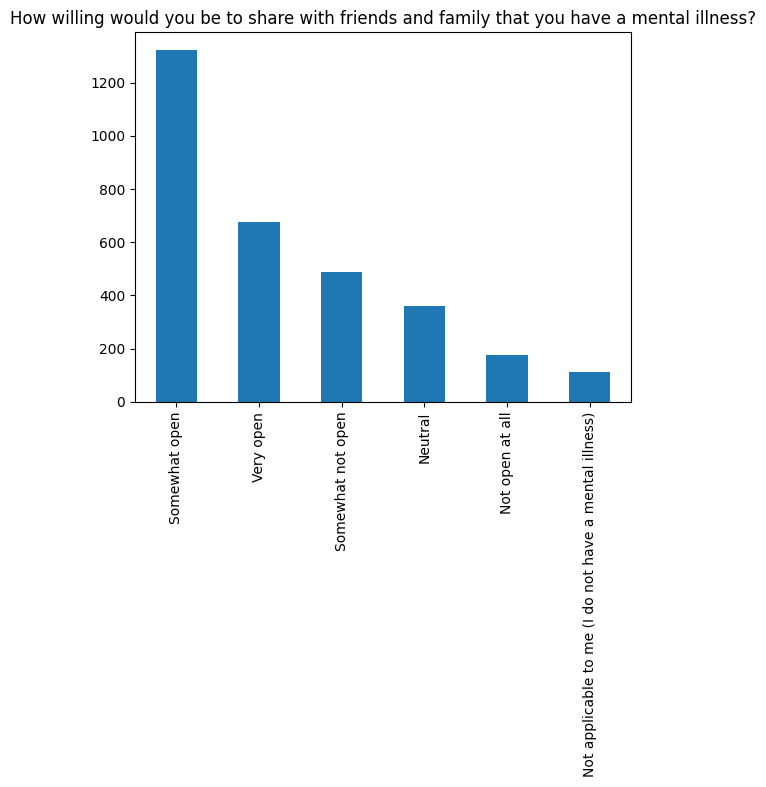

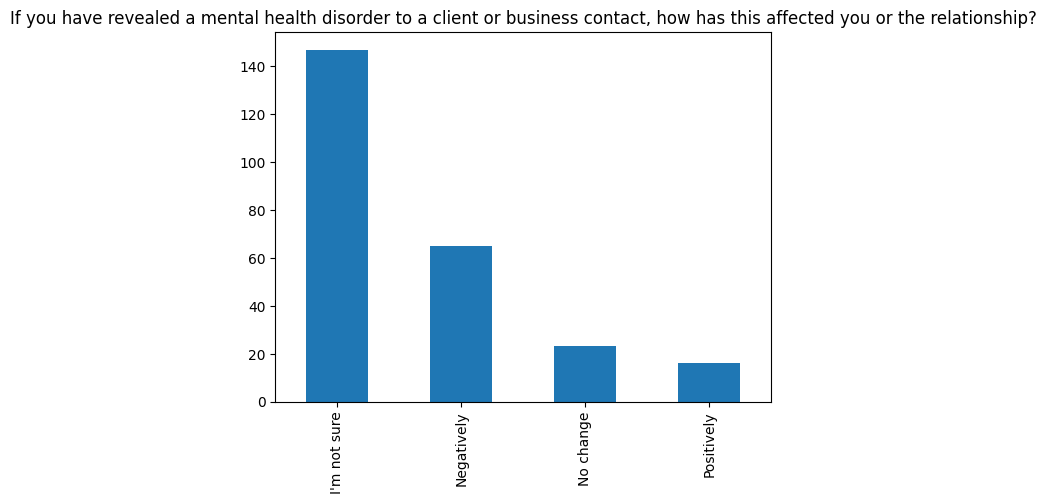

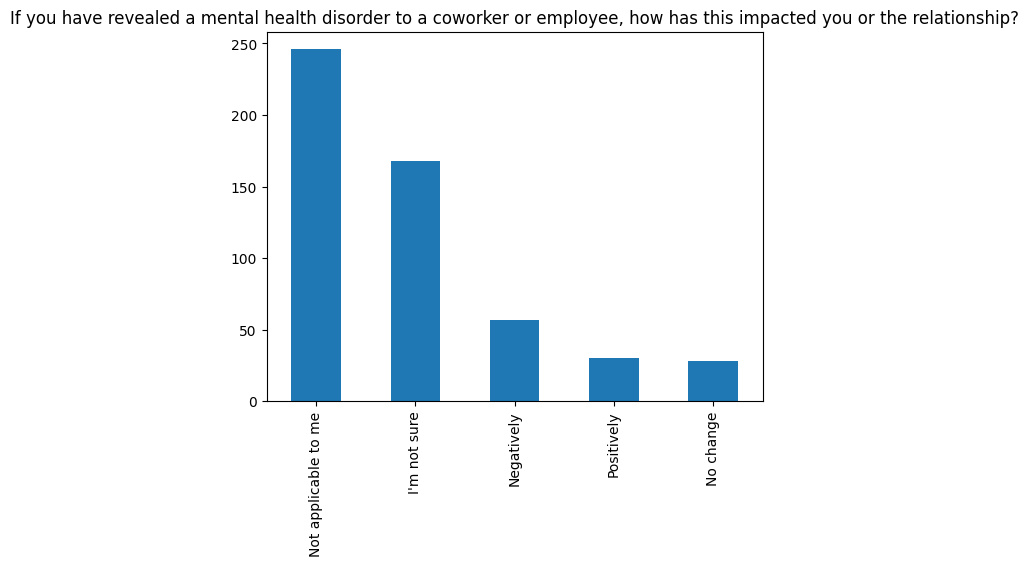

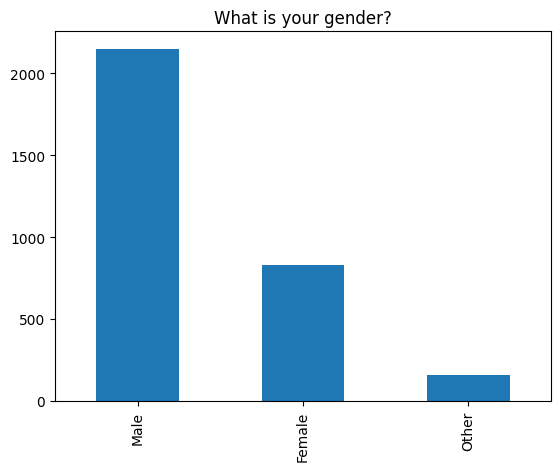

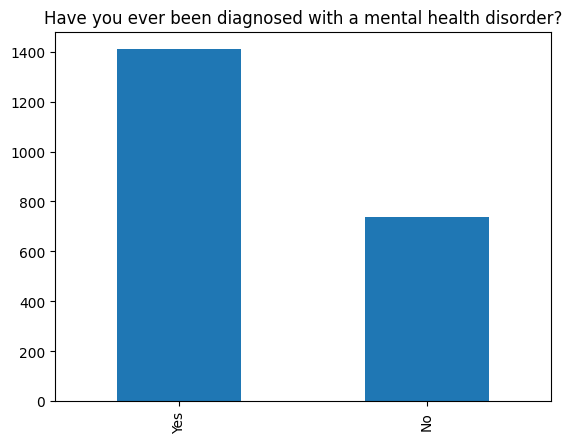

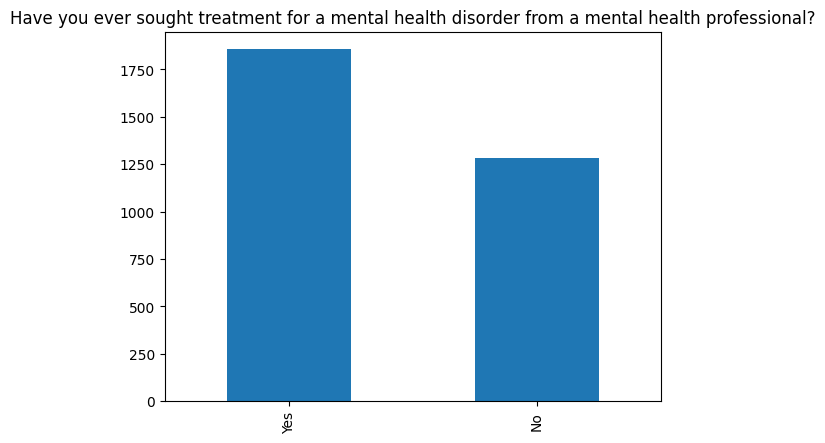

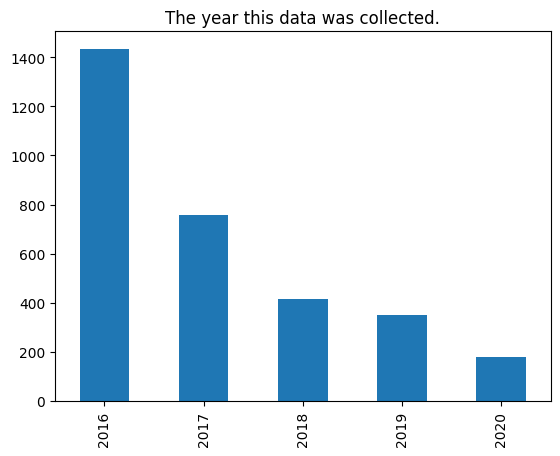

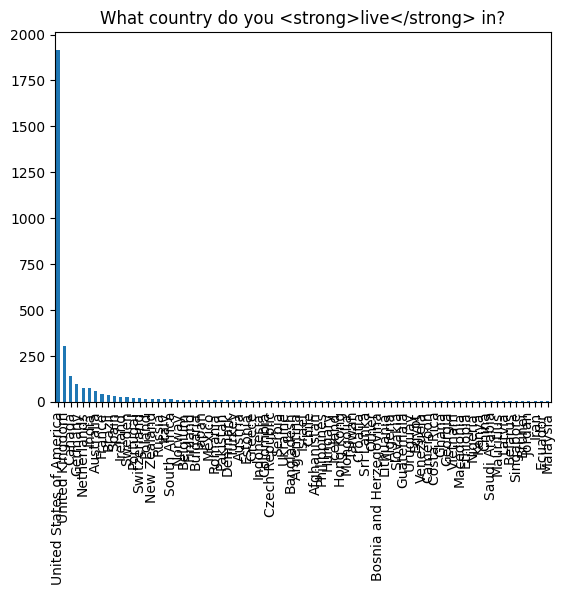

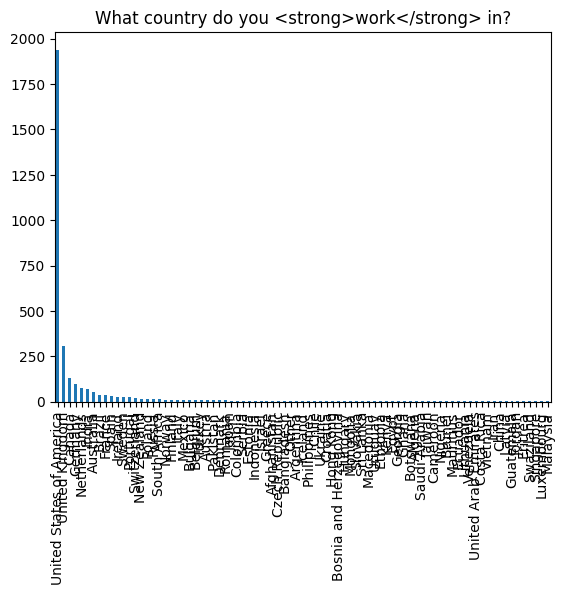

In [61]:
# Next Categorical attributes
for att in cat_attribues:
    in_df[att].value_counts().plot(kind='bar', color='C0')
    plt.title(Column_dict[att])
    plt.savefig('%s.png' % att, bbox_inches='tight')
    plt.show()

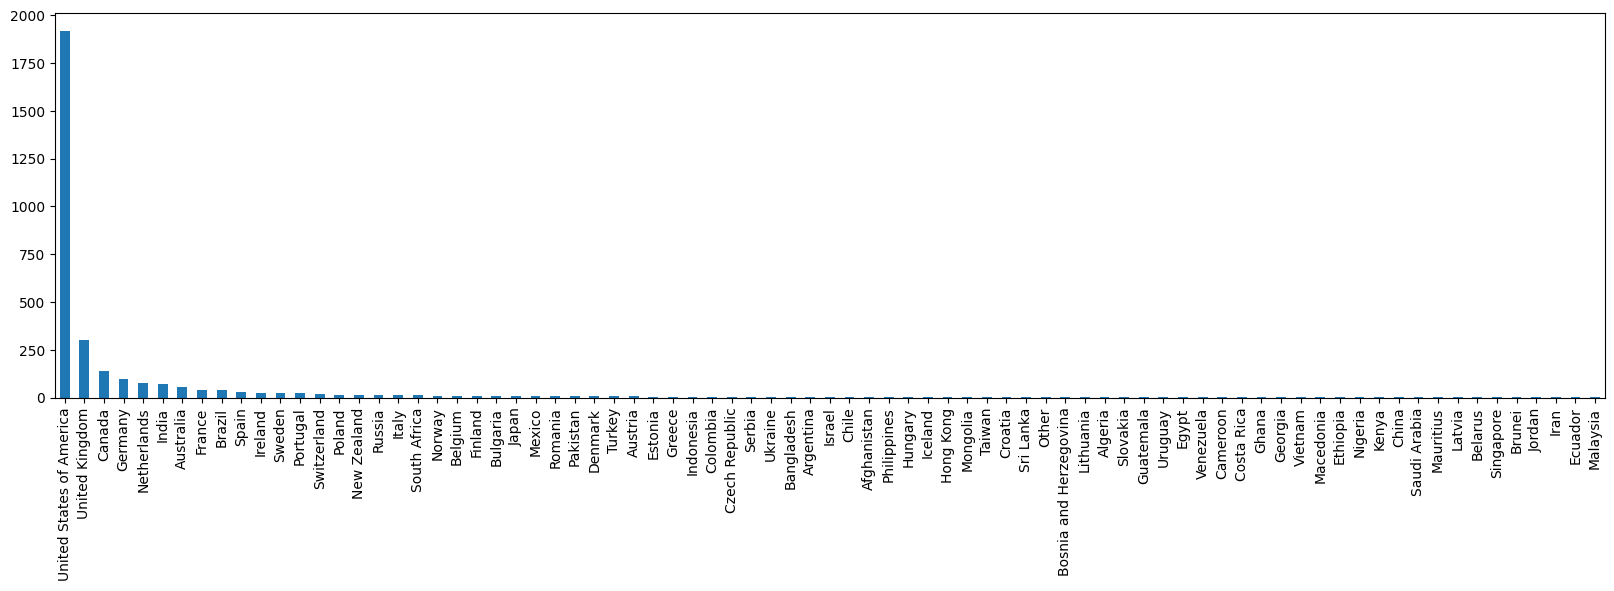

In [62]:
plt.figure(figsize=(20,5))
in_df['ResidingCountry'].value_counts().plot(kind='bar', color='C0')
plt.savefig('ResidingCountry.png', dpi=1000,bbox_inches='tight')

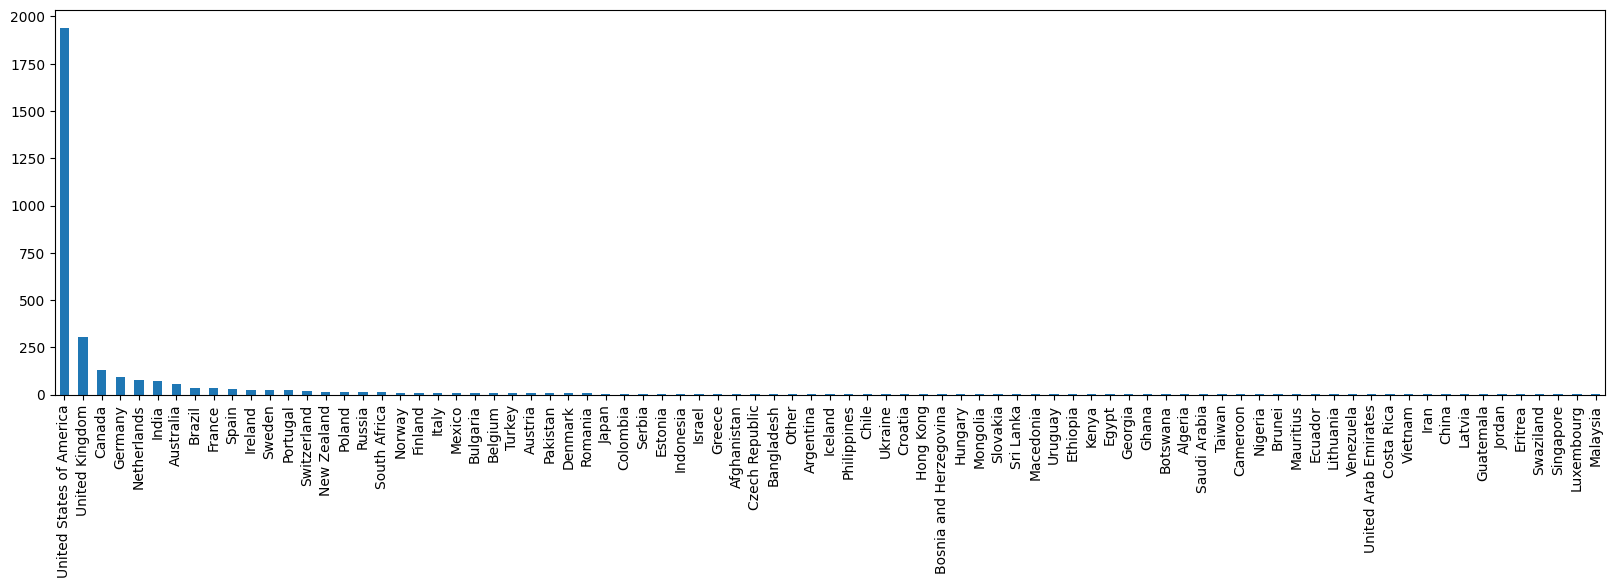

In [63]:
plt.figure(figsize=(20,5))
in_df['WorkingCountry'].value_counts().plot(kind='bar', color='C0')
plt.savefig('WorkingCountry.png', dpi=1000,bbox_inches='tight')

In [64]:
BM = (in_df.WorkingCountry == 'United States of America') & (in_df.ResidingCountry == 'United States of America')

in_df = pd.DataFrame(in_df[BM])

In [65]:
in_df.WorkingCountry.value_counts()

United States of America    1913
Name: WorkingCountry, dtype: int64

In [66]:
in_df.ResidingCountry.value_counts()

United States of America    1913
Name: ResidingCountry, dtype: int64

In [67]:
in_df.drop(columns=['WorkingCountry','ResidingCountry'],inplace=True)

# **Detecting and dealing with Missing values**

In [68]:
print('Number of Missing Values')
for col in in_df.columns:
    BM = in_df[col].isnull()
    wdf = in_df[BM]
    print(col)
    print(len(wdf))
    print('---------------------------------------')

Number of Missing Values
SupportQ1
228
---------------------------------------
SupportQ2
228
---------------------------------------
SupportQ3
228
---------------------------------------
SupportQ4
228
---------------------------------------
SupportQ5
228
---------------------------------------
AttitudeQ1
228
---------------------------------------
AttitudeQ2
228
---------------------------------------
AttitudeQ3
0
---------------------------------------
SupportEx1
1810
---------------------------------------
SupportEx2
1685
---------------------------------------
Age
4
---------------------------------------
Gender
0
---------------------------------------
MentalIlness
536
---------------------------------------
Treatment
0
---------------------------------------
Year
0
---------------------------------------


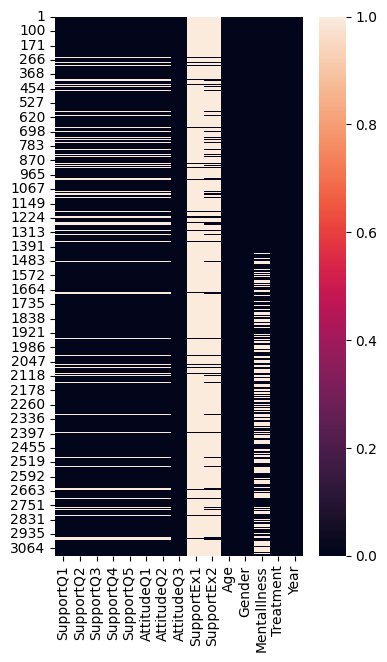

In [69]:
plt.figure(figsize=(4,7))
sns.heatmap(in_df.isna())
plt.savefig('MV_Assortment.png', dpi=1000,bbox_inches='tight')

In [70]:
in_df.drop(columns=['SupportEx1','SupportEx2'],inplace=True)

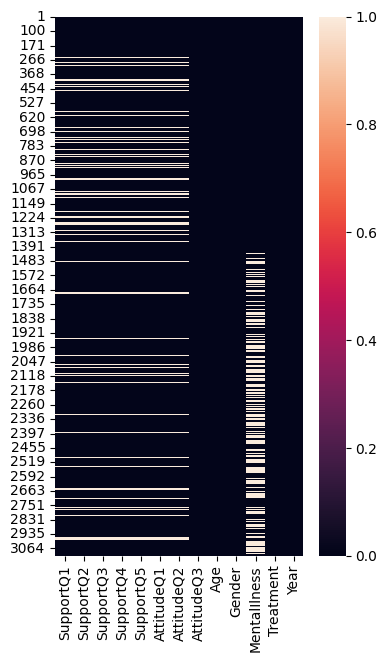

In [71]:
plt.figure(figsize=(4,7))
sns.heatmap(in_df.isna())
plt.show()

# **The common Missing values in attributes SupportQ1 to AttitudeQ3**

In [72]:
# Code from Chapter 11 for the diagnosis of MVs
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Age:


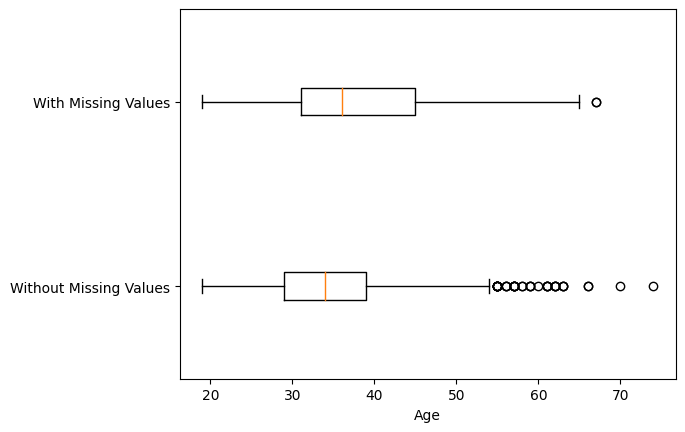

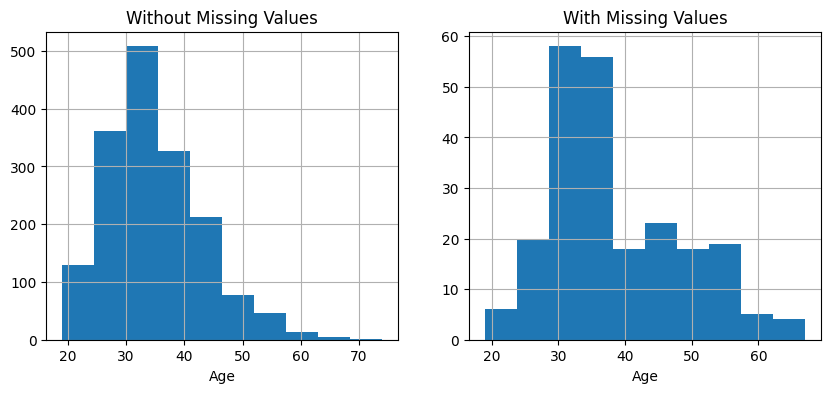

p-value of t-test: 4.807267428880384e-10
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [73]:
numerical_attributes = ['Age']

BM_MV = in_df.SupportQ1.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

In [74]:
# Code from Chapter 11 for the diagnosis of MVs
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for AttitudeQ3:


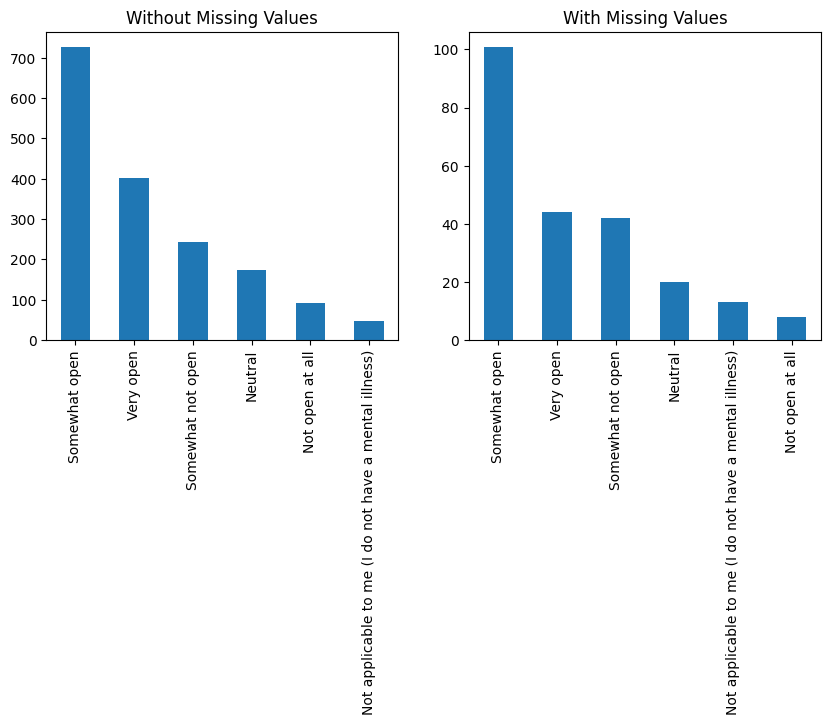

p-value of Chi_squared test: 0.04761658679854561
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Gender:


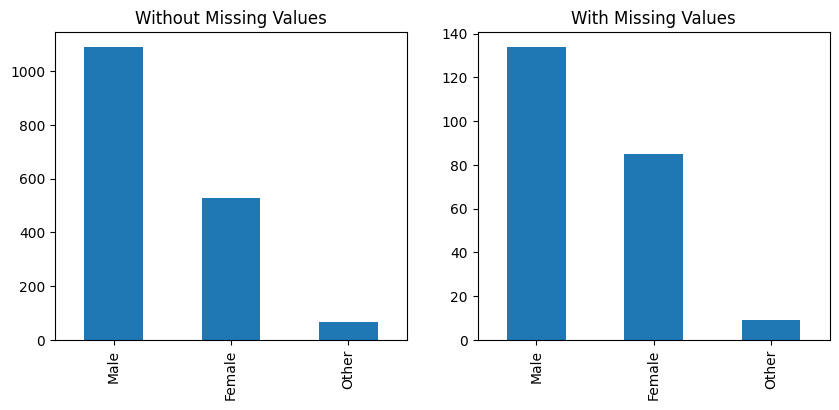

p-value of Chi_squared test: 0.1858113917370415
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for MentalIlness:


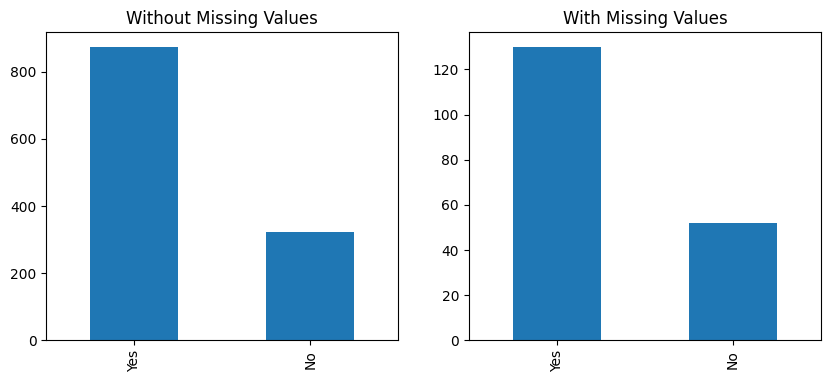

p-value of Chi_squared test: 0.693647485888784
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Treatment:


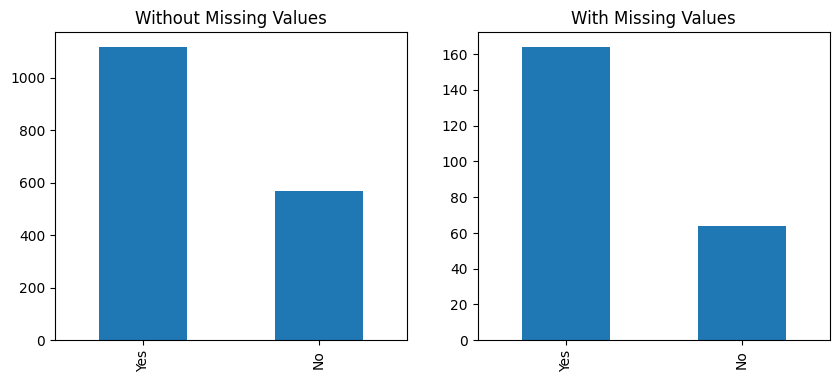

p-value of Chi_squared test: 0.10810722533716499
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Year:


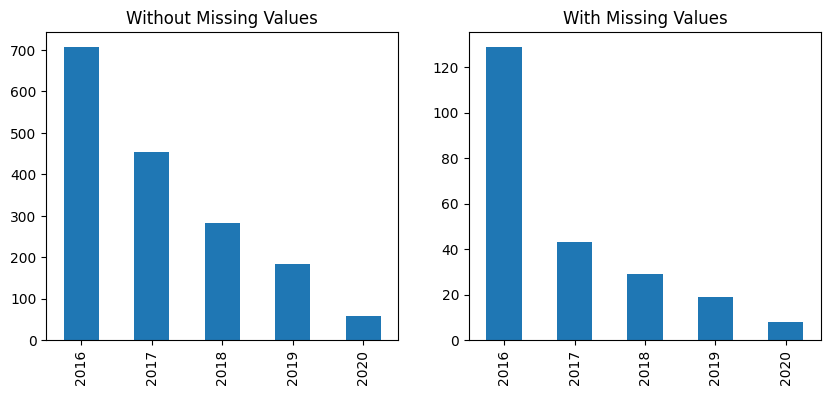

p-value of Chi_squared test: 0.0012055539174552995
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [75]:
cat_attribues = ['AttitudeQ3', 'Gender', 'MentalIlness', 'Treatment', 'Year']

BM_MV = in_df.SupportQ1.isna()
for att in cat_attribues:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

# **The Missing values in the attribute MentalIlness**

In [76]:
BM_MV = in_df.MentalIlness.isna()
print(sum(BM_MV))
print(sum(BM_MV)/len(in_df))

536
0.2801881860951385


Diagnosis Analysis of Missing Values for Age:


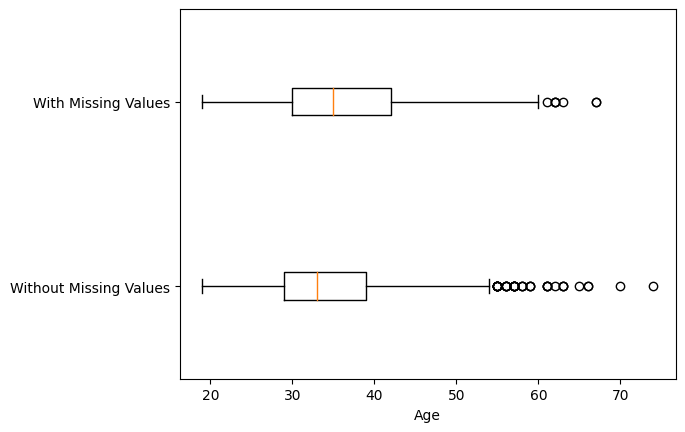

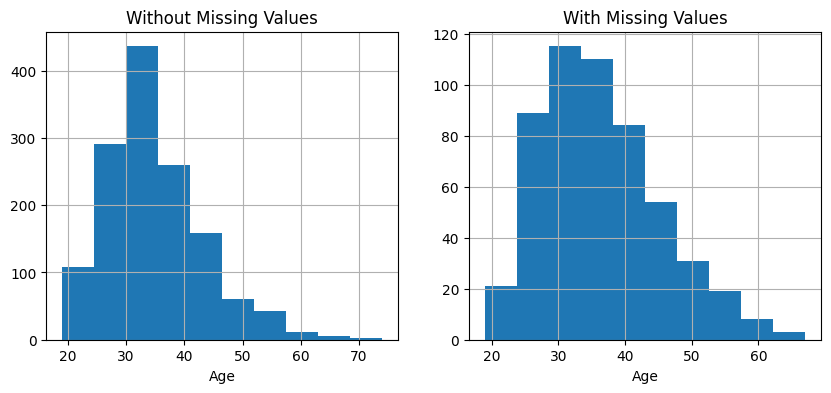

p-value of t-test: 6.924335766869287e-05
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [77]:
numerical_attributes = ['Age']

BM_MV = in_df.MentalIlness.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

Diagnosis Analysis of Missing Values for SupportQ1:
Does your employer provide mental health benefits as part of healthcare coverage?


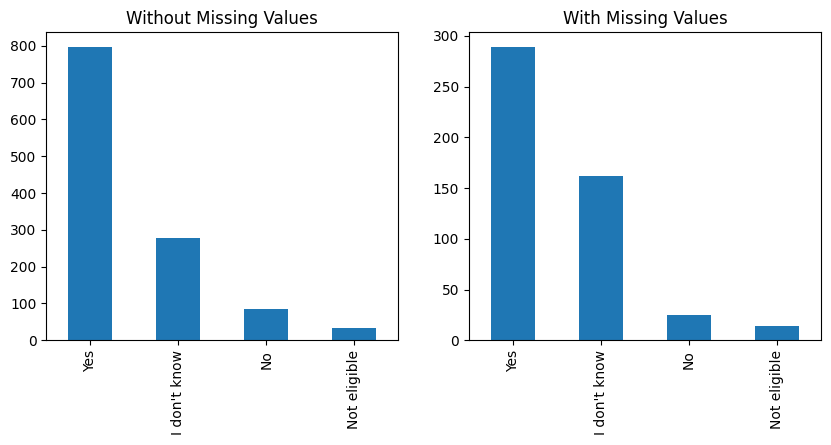

p-value of Chi_squared test: 0.0004266621820911183
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ2:
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?


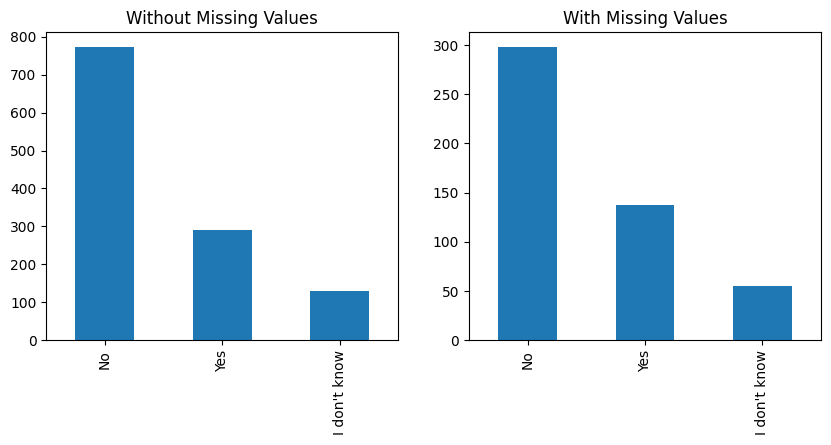

p-value of Chi_squared test: 0.26967281692328904
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ3:
Does your employer offer resources to learn more about mental health disorders and options for seeking help?


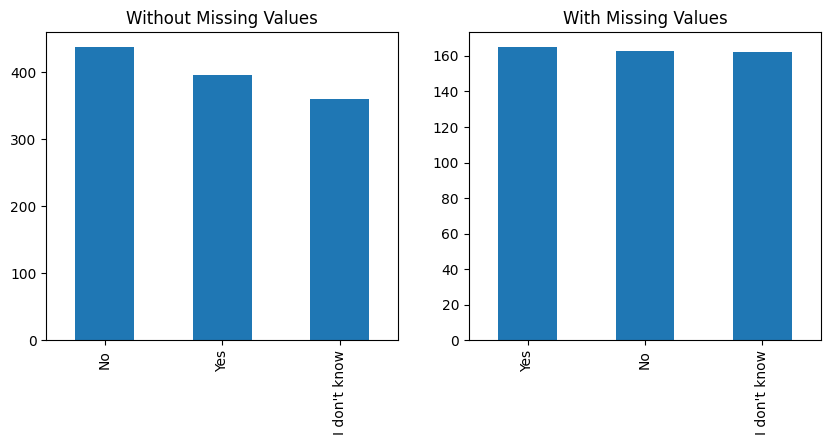

p-value of Chi_squared test: 0.3572638558201442
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ4:
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?


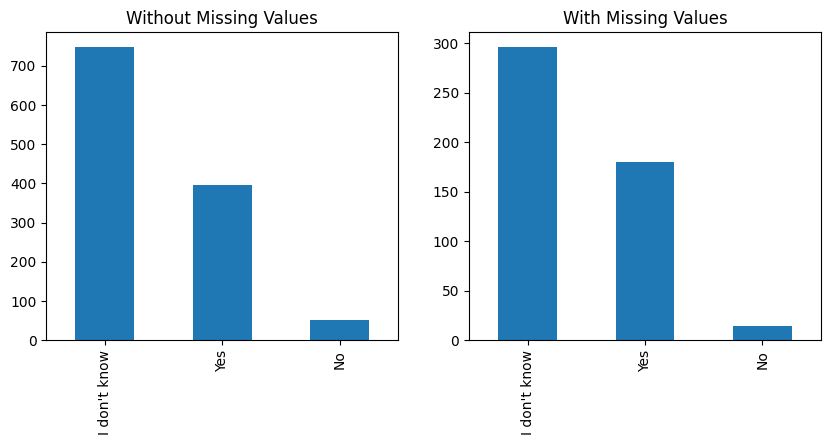

p-value of Chi_squared test: 0.16296549689934467
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ5:
If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?


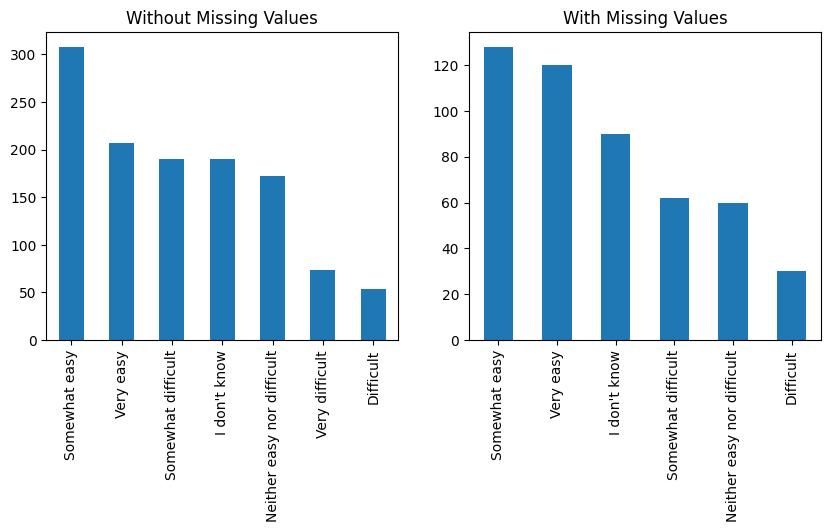

p-value of Chi_squared test: 2.6531252599614132e-08
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AttitudeQ1:
Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?


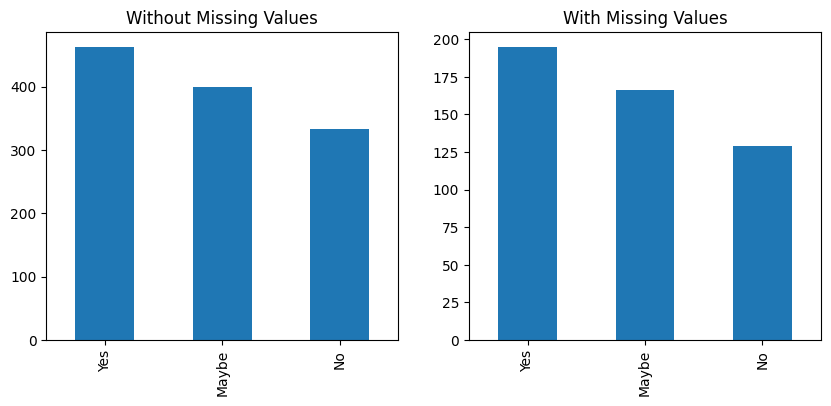

p-value of Chi_squared test: 0.8091802115423412
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AttitudeQ2:
Would you feel comfortable discussing a mental health issue with your coworkers?


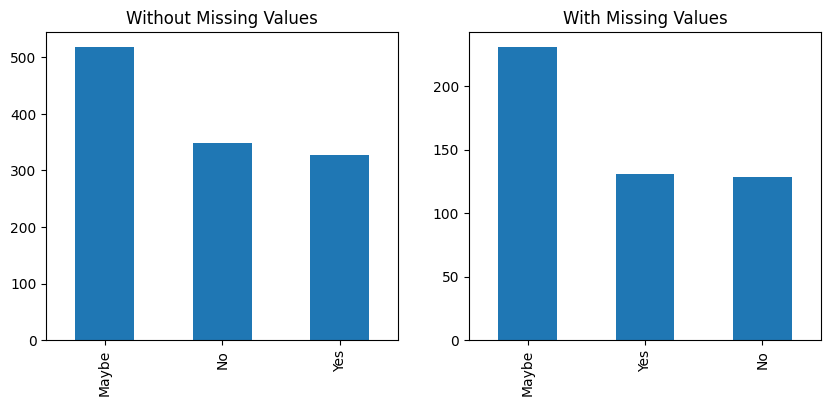

p-value of Chi_squared test: 0.3251602604350022
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AttitudeQ3:
How willing would you be to share with friends and family that you have a mental illness?


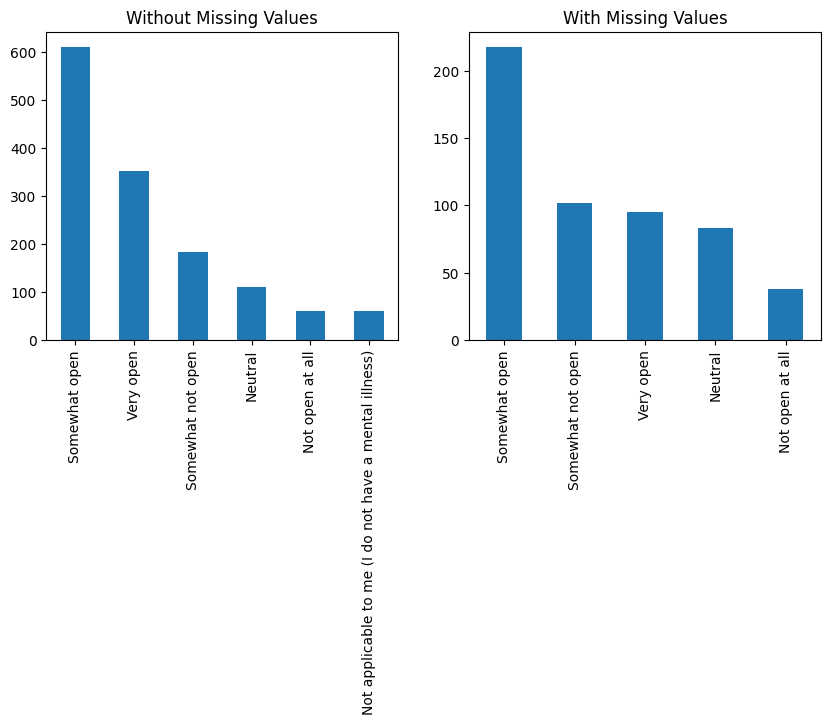

p-value of Chi_squared test: 1.2350378950902818e-13
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Gender:
What is your gender?


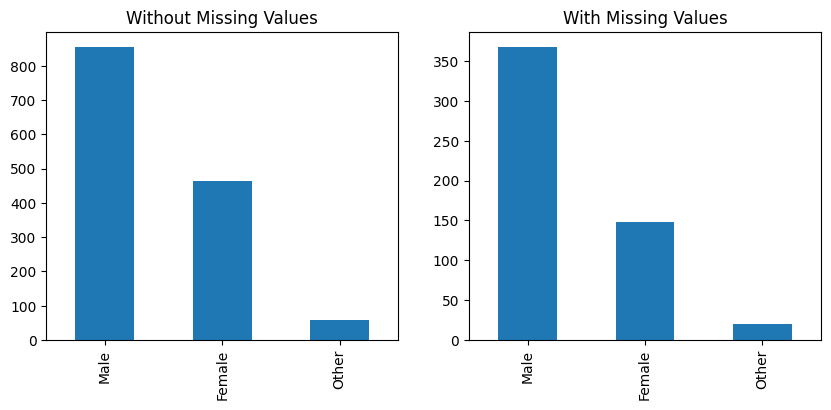

p-value of Chi_squared test: 0.02778866261990665
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Treatment:
Have you ever sought treatment for a mental health disorder from a mental health professional?


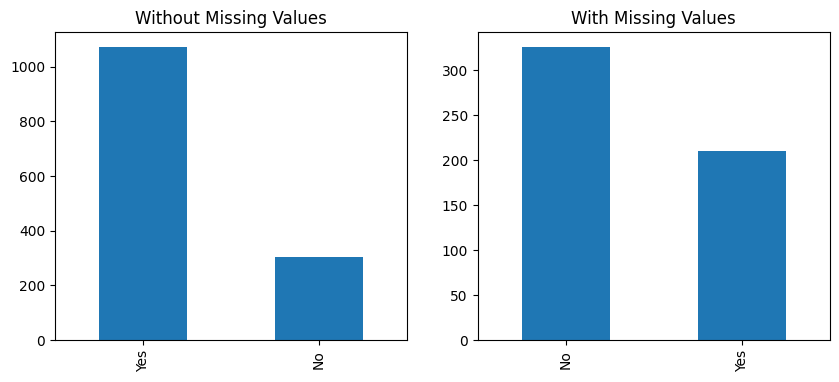

p-value of Chi_squared test: 2.4710734891681166e-58
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Year:
The year this data was collected.


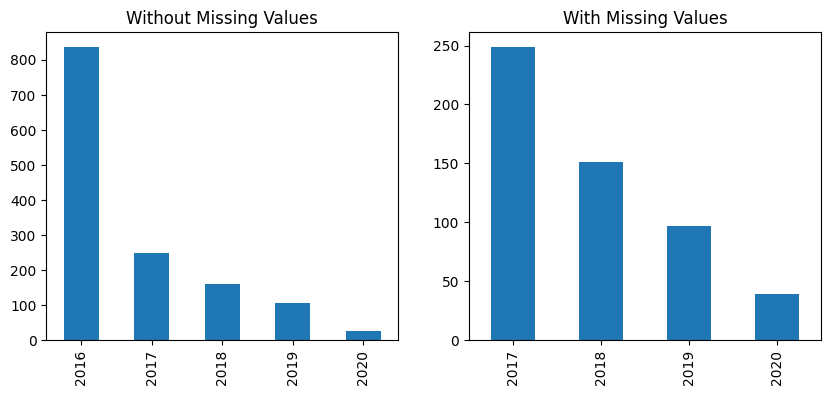

p-value of Chi_squared test: 6.48536081496545e-125
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [78]:
cat_attribues = ['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5',
       'AttitudeQ1', 'AttitudeQ2', 'AttitudeQ3', 'Gender', 'Treatment', 'Year']

BM_MV = in_df.MentalIlness.isna()
for att in cat_attribues:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    print(Column_dict[att])
    Diagnose_MV_Categorical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

# **Analysis**

**Analysis Question 1: Is there a significant difference between the mental health of employees across the attribute of gender?**

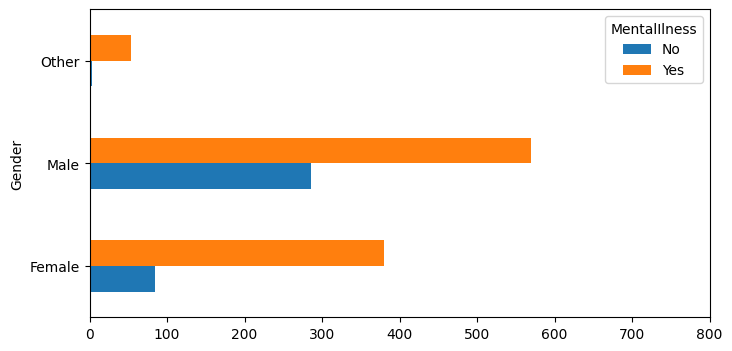

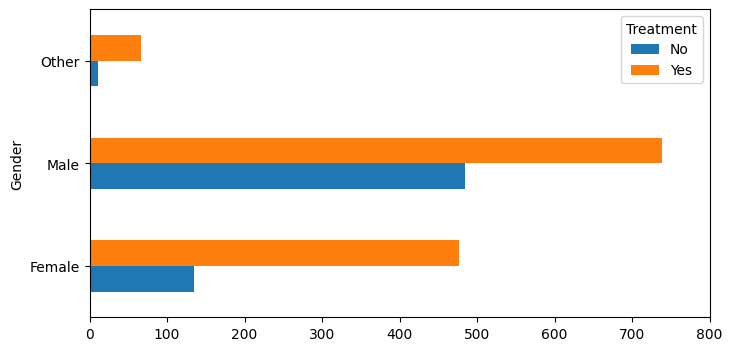

In [79]:
in_df.groupby(['Gender','MentalIlness']).size().unstack().plot.barh(xlim=[0,800],figsize=(8,4))
in_df.groupby(['Gender','Treatment']).size().unstack().plot.barh(xlim=[0,800],figsize=(8,4))
plt.show()

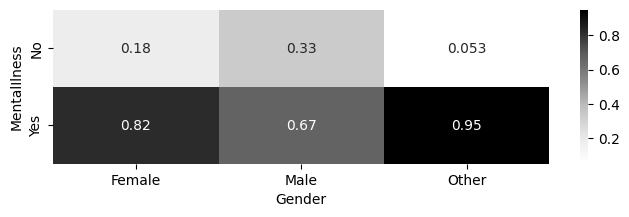

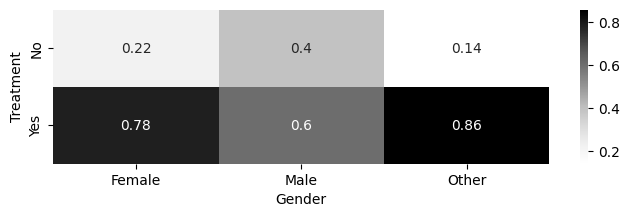

In [80]:
plt.figure(figsize=(8,2))
cont_table = pd.crosstab(in_df.MentalIlness,in_df.Gender)
probablity_tbl = cont_table/ cont_table.sum()
sns.heatmap(probablity_tbl,annot=True, center=0.5 ,cmap="Greys")
plt.show()

plt.figure(figsize=(8,2))
cont_table = pd.crosstab(in_df.Treatment,in_df.Gender)
probablity_tbl = cont_table/ cont_table.sum()
sns.heatmap(probablity_tbl,annot=True, center=0.5 ,cmap="Greys")
plt.show()

# Analysis Question 2: Is there a significant difference between the mental health of employees across the attribute of Age?

In [81]:
BM_Age_MV =  in_df.Age.isna()
wdf = pd.DataFrame(in_df[~BM])
wdf

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,Age,Gender,MentalIlness,Treatment,Year
1,No,Yes,Yes,Yes,Somewhat easy,Yes,Maybe,Somewhat open,29.0,Male,Yes,Yes,2016
4,Yes,No,No,No,Neither easy nor difficult,No,Maybe,Somewhat open,43.0,Female,Yes,Yes,2016
6,I don't know,No,No,I don't know,Somewhat easy,Yes,Maybe,Not applicable to me (I do not have a mental i...,30.0,Male,No,No,2016
7,Yes,No,Yes,Yes,Very easy,Yes,Maybe,Somewhat open,37.0,Female,Yes,Yes,2016
8,I don't know,No,No,I don't know,Very difficult,Maybe,Yes,Somewhat open,44.0,Female,Yes,Yes,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,Yes,No,No,Yes,Difficult,Maybe,Maybe,Not open at all,34.0,Male,Yes,Yes,2020
3126,Yes,Yes,Yes,I don't know,Very easy,Yes,Yes,Very open,39.0,Male,Yes,Yes,2020
3129,Yes,Yes,Yes,Yes,Very easy,Maybe,Maybe,Somewhat open,39.0,Male,NaN,Yes,2020
3133,No,No,No,No,Somewhat difficult,No,No,Very open,53.0,Male,NaN,No,2020


In [82]:
wdf['ageGroup'] = pd.qcut(wdf.Age,3,labels=['<30','31-37','>38'])
wdf.ageGroup.value_counts()

<30      652
>38      634
31-37    623
Name: ageGroup, dtype: int64

In [83]:
BM_MV = wdf.MentalIlness.isna()
wdf.loc[wdf[BM_MV].index,'MentalIlness'] = 'MV-MAR'

In [84]:
wdf.MentalIlness.value_counts()

Yes       1004
MV-MAR     536
No         373
Name: MentalIlness, dtype: int64

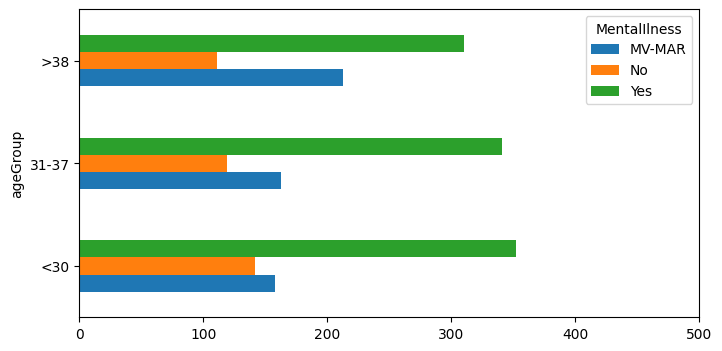

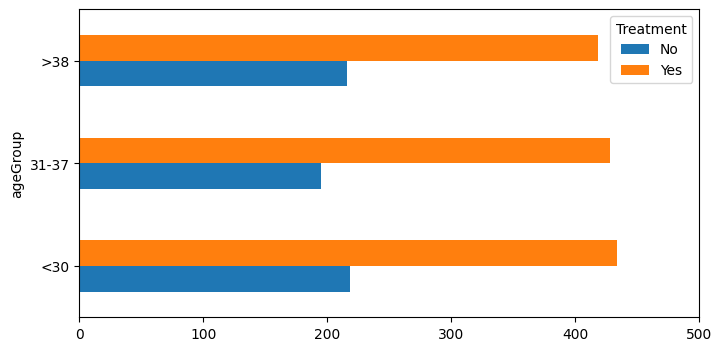

In [85]:
wdf.groupby(['ageGroup','MentalIlness']).size().unstack().plot.barh(xlim=[0,500],figsize=(8,4))
wdf.groupby(['ageGroup','Treatment']).size().unstack().plot.barh(xlim=[0,500],figsize=(8,4))
plt.show()

In [86]:
from scipy.stats import chi2_contingency
contigency_table = pd.crosstab(wdf.ageGroup,wdf.MentalIlness)
p_value = chi2_contingency(contigency_table)[1]
print('p-value of Chi_squared test: {}'.format(p_value))

p-value of Chi_squared test: 0.0022404788218729006


In [87]:
from scipy.stats import chi2_contingency
contigency_table = pd.crosstab(wdf.ageGroup,wdf.Treatment)
p_value = chi2_contingency(contigency_table)[1]
print('p-value of Chi_squared test: {}'.format(p_value))

p-value of Chi_squared test: 0.549702095016964


# Analysis Question 3: Do more supportive companies lead to having healthier employees mentally?

In [88]:
def CalculateSupportScore(row):
    s = 0
    if(row.SupportQ1 == 'Yes'):
        s = s +1
    if(row.SupportQ1 == 'No'):
        s = s -1
    if(row.SupportQ1 == 'Not eligible'):
        s = s -0.5

    if(row.SupportQ2 == 'Yes'):
        s = s +1
    if(row.SupportQ2 == 'No'):
        s = s -1

    if(row.SupportQ3 == 'Yes'):
        s = s +1
    if(row.SupportQ3 == 'No'):
        s = s -1

    if(row.SupportQ4 == 'Yes'):
        s = s +1
    if(row.SupportQ4 == 'No'):
        s = s -1

    if(row.SupportQ5 == 'Very easy'):
        s = s +1
    if(row.SupportQ5 == 'Somewhat easy'):
        s = s +0.5
    if(row.SupportQ5 == 'Somewhat difficult'):
        s = s - 0.5
    if(row.SupportQ5 == 'Somewhat difficult'):
        s = s - 0.75
    if(row.SupportQ5 == 'Very difficult'):
        s = s -1
    return s

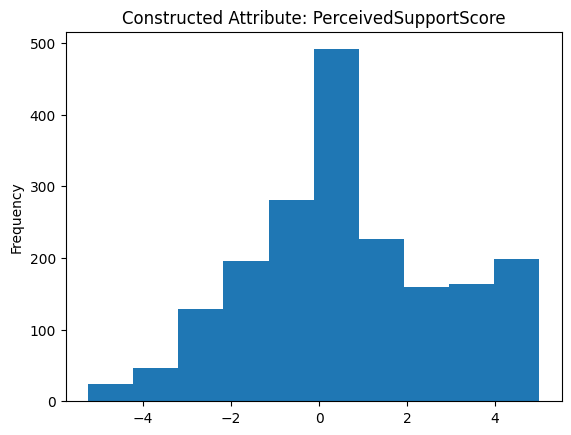

In [89]:
in_df['PerceivedSupportScore'] = in_df.apply(CalculateSupportScore, axis = 1)
in_df.PerceivedSupportScore.plot(kind='hist')
plt.title('Constructed Attribute: PerceivedSupportScore')
plt.show()

In [90]:
def SupporiveOrNot(v):
    if(v>1):
        return('Supportive')
    elif(v<-0.5):
        return('Unsupprotive')
    else:
        return('Neutral')

In [91]:
in_df['perceivedSupportGroup'] = in_df.PerceivedSupportScore.apply(SupporiveOrNot)

In [92]:
in_df.perceivedSupportGroup.value_counts()

Neutral         764
Supportive      593
Unsupprotive    556
Name: perceivedSupportGroup, dtype: int64

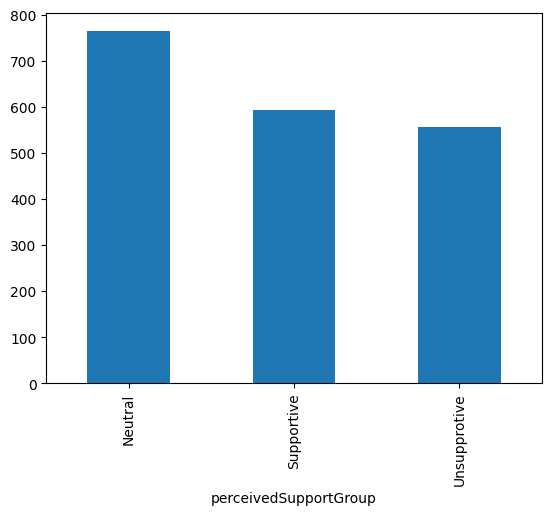

In [93]:
in_df.groupby('perceivedSupportGroup').size().plot(kind='bar')
plt.show()

In [94]:
BM = in_df.perceivedSupportGroup == 'Neutral'
wdf = pd.DataFrame(in_df[~BM])

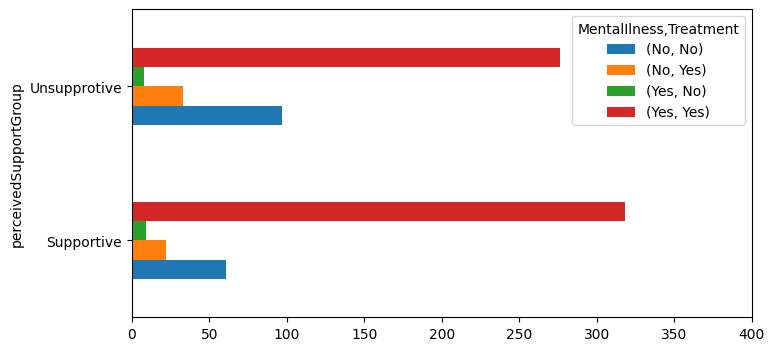

In [95]:
wdf.groupby(['perceivedSupportGroup','Treatment','MentalIlness']).size().unstack().unstack().plot.barh(xlim=[0,400],figsize=(8,4))
plt.show()

# **Analysis Question 4: Does the attitude of individuals toward mental health influence their mental health and their seeking of treatments?**

In [96]:
def CalculateAttitudeScore(row):
    s = 0
    if(row.AttitudeQ1 == 'Very open'):
        s = s +1
    if(row.AttitudeQ1 == 'No'):
        s = s -1

    if(row.AttitudeQ1 == 'Yes'):
        s = s +1
    if(row.AttitudeQ1 == 'No'):
        s = s -1

    if(row.AttitudeQ3 == 'Yes'):
        s = s +1
    if(row.AttitudeQ3 == 'Somewhat open'):
        s = s +0.5
    if(row.AttitudeQ3 == 'Somewhat not open'):
        s = s -0.5
    if(row.AttitudeQ3 == 'Not open at all'):
        s = s -1

    return s

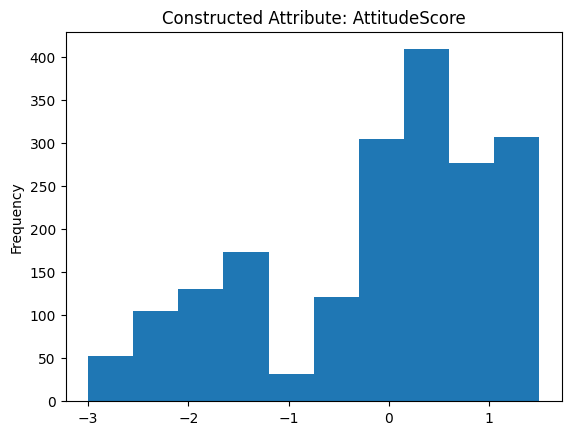

In [97]:
in_df['AttitudeScore'] = in_df.apply(CalculateAttitudeScore, axis = 1)
in_df.AttitudeScore.plot(kind='hist')
plt.title('Constructed Attribute: AttitudeScore')
plt.show()

In [98]:
in_df['RandomNumber'] = np.random.random(len(in_df))
in_df['AttitudeScore_r'] = in_df.AttitudeScore.apply(lambda v: v+np.random.random()-0.75)

In [99]:
def OpenorClose(v):
    if(v>.5):
        return('OpenAttitude')
    elif(v>-0.5):
        return('Neutral')
    else:
        return('ClosedAttitude')

In [100]:
in_df['attitudeGroup'] = in_df.AttitudeScore.apply(OpenorClose)

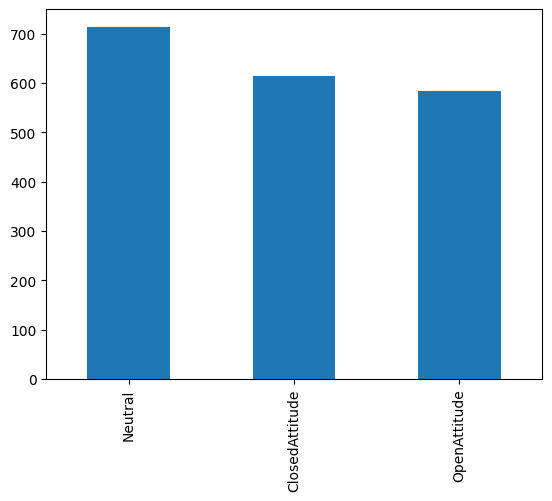

In [101]:
in_df.attitudeGroup.value_counts().plot(kind='bar')
plt.show()

In [102]:
BM = in_df.attitudeGroup == 'Neutral'
wdf = pd.DataFrame(in_df[~BM])

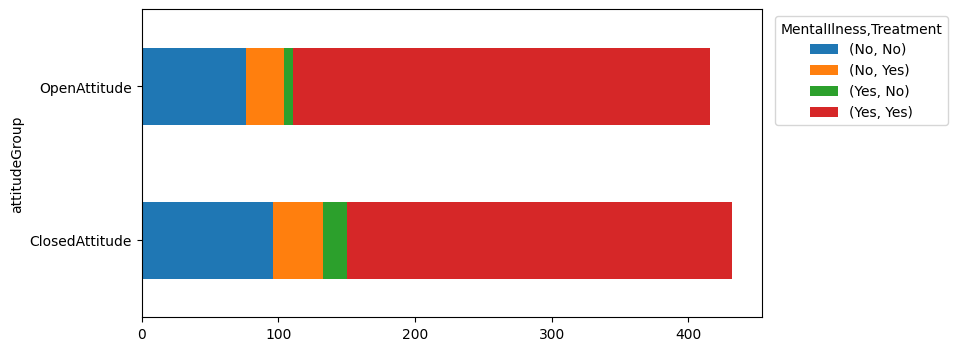

In [103]:
wdf.groupby(['attitudeGroup','Treatment','MentalIlness']).size().unstack().unstack().plot.barh(figsize=(8,4),stacked=True)
plt.legend(title = 'MentalIlness,Treatment', bbox_to_anchor=(1.01, 1))
plt.show()